# **Project Name**    - Zomato Project



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -** Solanki Milan

# **Project Summary -**

The Zomato Restaurant Clustering project aimed to analyze customer reviews using unsupervised machine learning techniques to segment restaurants based on review patterns, customer sentiment, and other relevant features. This analysis provides valuable insights into customer preferences, sentiment trends, and operational factors, which can help businesses improve customer satisfaction and target specific audience segments effectively.

The primary objective of the project was to:

1. Cluster customer reviews from the Zomato dataset to identify meaningful patterns.
2. Evaluate and compare the performance of three clustering algorithms—K-Means, DBSCAN, and Hierarchical Clustering—using appropriate evaluation metrics.
3. Identify critical features influencing customer sentiment and restaurant performance.
4. Provide actionable insights for business decision-making through customer segmentation and sentiment analysis.

Methodology:

Data Collection & Preprocessing

The dataset consisted of customer reviews and metadata, including fields such as review text, rating, time, number of reviews, number of followers, and cost. We performed essential preprocessing tasks like handling missing values, text cleaning, and feature extraction. Additionally, we computed new features such as review length to capture sentiment intensity.

Feature Selection:

Clustering Techniques Applied We implemented and compared the following clustering algorithms:
K-Means Clustering: Partitioned the dataset into a predefined number of clusters.
DBSCAN (Density-Based Spatial Clustering of Applications with Noise): Identified clusters based on data density, effective for detecting noise.
Hierarchical Clustering: Built a tree-based structure to capture nested relationships between data points.

Model Evaluation:
We used Silhouette Score to evaluate cluster cohesion and separation. This metric provides an indication of how well the clusters represent distinct groups. Higher scores indicate better-defined clusters.


# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


### The Project focuses on Customers and Company, you have to analyze the sentiments of the reviews given by the customer in the data and make some useful conclusions in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solves some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in. This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [4]:
# Load Dataset
metadata=pd.read_csv("/Users/milansolanki/Desktop/ML internship/project4/Zomato Restaurant names and Metadata.csv")
review=pd.read_csv("/Users/milansolanki/Desktop/ML internship/project4/Zomato Restaurant reviews.csv")

### Dataset First View

In [5]:
# Dataset First Look
print(metadata.head())

                             Name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links   Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...    800   
1  https://www.zomato.com/hyderabad/paradise-gach...    800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1,200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                            Cuisines  \
0  Ch

In [6]:
print(review.head())

        Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Follower  5/24/2019 22:11         0  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0  


### Dataset Rows & Columns count

In [8]:
# Dataset Rows & Columns count
print("\nDataset Shape (Rows, Columns) for Metadata :", metadata.shape)



Dataset Shape (Rows, Columns) for Metadata : (105, 6)


In [9]:
print("\nDataset Shape (Rows, Columns) for Review :", review.shape)



Dataset Shape (Rows, Columns) for Review : (10000, 7)


### Dataset Information

In [11]:
# Dataset Info
print("\nDataset Info Metadata:")
print(metadata.info())


Dataset Info Metadata:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.1+ KB
None


In [12]:
print("\nDataset Info Review:")
print(review.info())


Dataset Info Review:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB
None


#### Duplicate Values

In [13]:
# Dataset Duplicate Value Count
duplicate_count = metadata.duplicated().sum()
print("\nNumber of duplicate rows in Name:", duplicate_count)



Number of duplicate rows in Name: 0


In [14]:
duplicate_count = review.duplicated().sum()
print("\nNumber of duplicate rows in review:", duplicate_count)



Number of duplicate rows in review: 36


#### Missing Values/Null Values

In [15]:
# Missing Values/Null Values Count
missing_values = metadata.isnull().sum()
print("\nMissing Values Count in Name:")
print(missing_values)



Missing Values Count in Name:
Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64


In [16]:
missing_values = review.isnull().sum()
print("\nMissing Values Count in review:")
print(missing_values)



Missing Values Count in review:
Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64


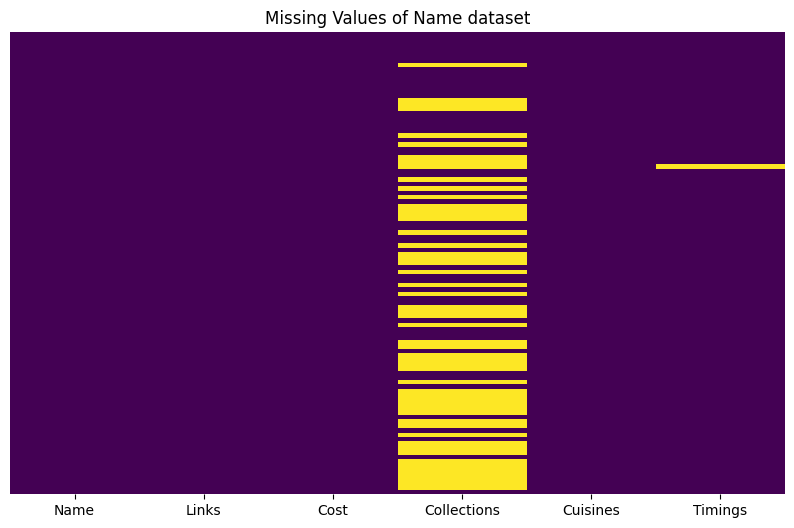

In [17]:
# Visualizing the missing values
plt.figure(figsize=(10, 6))
sns.heatmap(metadata.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Values of Name dataset")
plt.show()

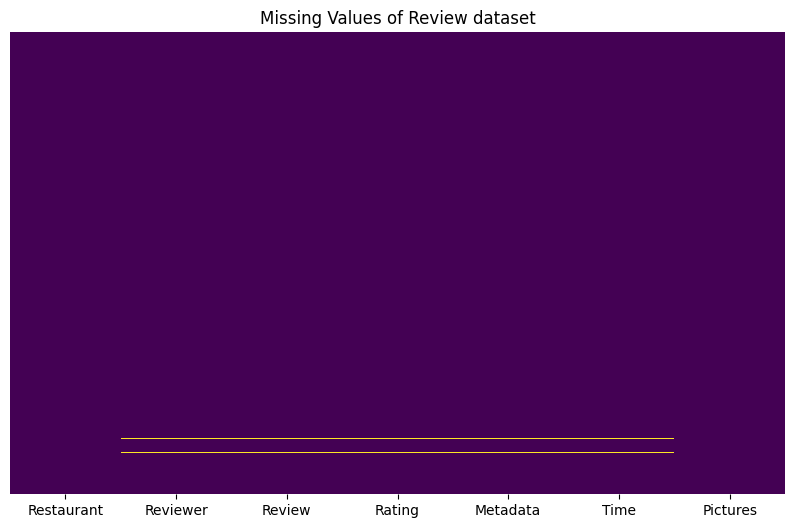

In [18]:
plt.figure(figsize=(10, 6))
sns.heatmap(review.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Values of Review dataset")
plt.show()

### What did you know about your dataset?

Here we have two different Dataset for sentiment analysis

1. Restaurants Name and Metatadat

Dataset Shape (Rows, Columns) for Name : (105, 6)

Number of duplicate rows in Name: 0

Missing values Collections    54

2. Restaurant Reviews

Dataset Shape (Rows, Columns) for Review : (10000, 7)

Number of duplicate rows: 36

Missing values Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38


## ***2. Understanding Your Variables***

In [19]:
# Dataset Columns

print("Dataset Columns in Name :")
print(metadata.columns)

Dataset Columns in Name :
Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')


In [20]:
# Dataset Columns
print("Dataset Columns Reviews:")
print(review.columns)

Dataset Columns Reviews:
Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')


In [24]:
# Dataset Describe
print("Numerical Summary - Metadata Dataset:")
print(metadata.describe(include="object"))

Numerical Summary - Metadata Dataset:
                   Name                                              Links  \
count               105                                                105   
unique              105                                                105   
top     Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   
freq                  1                                                  1   

       Cost                                  Collections  \
count   105                                           51   
unique   29                                           42   
top     500  Food Hygiene Rated Restaurants in Hyderabad   
freq     13                                            4   

                     Cuisines         Timings  
count                     105             104  
unique                     92              77  
top     North Indian, Chinese  11 AM to 11 PM  
freq                        4               6  


In [23]:
# Dataset Describe
print("Numerical Summary - Review Dataset:")
print(review.describe(include="object"))

Numerical Summary - Review Dataset:
             Restaurant     Reviewer Review Rating  Metadata             Time
count             10000         9962   9955   9962      9962             9962
unique              100         7446   9364     10      2477             9782
top     Beyond Flavours  Parijat Ray   good      5  1 Review  7/29/2018 20:34
freq                100           13    237   3832       919                3


### Variables Description

Name & Metadata Dataset:

Name- Name of Restaurants

Links- URL Links of Restaurants

Cost- Per person estimated cost of dining

Collection- Tagging of Restaurants w.r.t. Zomato categories

Cuisines- Cuisines served by restaurants

Timiings: Timing of Restaurants

Review Dataset:

Reviewer- Name of the reviewer

review- Review text

Rating- Rating provided

MetaData- Reviewer metadata-No of reviews and followers

Time- Date and Time of Review

Pictures- No of pictures posted with review.

### Check Unique Values for each variable.

In [25]:
# Check Unique Values for each variable.
# Unique values in Titles dataset
print("Unique Values in Name Dataset:")
for column in metadata.columns:
    print(f"{column}: {metadata[column].nunique()} unique values")

# Unique values in Credits dataset
print("\nUnique Values in Review Dataset:")
for column in review.columns:
    print(f"{column}: {review[column].nunique()} unique values")


Unique Values in Name Dataset:
Name: 105 unique values
Links: 105 unique values
Cost: 29 unique values
Collections: 42 unique values
Cuisines: 92 unique values
Timings: 77 unique values

Unique Values in Review Dataset:
Restaurant: 100 unique values
Reviewer: 7446 unique values
Review: 9364 unique values
Rating: 10 unique values
Metadata: 2477 unique values
Time: 9782 unique values
Pictures: 36 unique values


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

#Handling Missing Values
metadata.fillna({"Collections":"Unknown"}, inplace=True)  # Fill missing collections
review.dropna(subset=["Reviewer", "Review", "Rating", "Metadata", "Time"], inplace=True)  # Drop missing values


In [28]:
# Step 2: Remove Duplicates
review.drop_duplicates(inplace=True)

In [29]:
# Step 3: Feature Engineering - Extract numerical values from Metadata
import re
def extract_numbers(metadata):
    numbers = re.findall(r'\d+', str(metadata))
    return list(map(int, numbers)) if numbers else [0, 0]

review[['Num_Reviews', 'Num_Followers']] = review["Metadata"].apply(lambda x: pd.Series(extract_numbers(x)))


In [30]:
# Step 4: Convert Data Types
review["Rating"] = pd.to_numeric(review["Rating"], errors='coerce')
review["Time"] = pd.to_datetime(review["Time"], errors='coerce')
metadata["Cost"] = metadata["Cost"].astype(str).str.replace(",", "").astype(float)

In [36]:
# Display updated dataset info
print("Reviews Dataset Info:")
print(review.info())


Reviews Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 9955 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Restaurant     9955 non-null   object        
 1   Reviewer       9955 non-null   object        
 2   Review         9955 non-null   object        
 3   Rating         9954 non-null   float64       
 4   Metadata       9955 non-null   object        
 5   Time           9955 non-null   datetime64[ns]
 6   Pictures       9955 non-null   int64         
 7   Num_Reviews    9955 non-null   float64       
 8   Num_Followers  8381 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 777.7+ KB
None


In [37]:
print("\nMetadata Dataset Info:")
print(metadata.info())


Metadata Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         105 non-null    object 
 1   Links        105 non-null    object 
 2   Cost         105 non-null    float64
 3   Collections  105 non-null    object 
 4   Cuisines     105 non-null    object 
 5   Timings      104 non-null    object 
dtypes: float64(1), object(5)
memory usage: 5.1+ KB
None


In [32]:

# Save cleaned datasets
review.to_csv("Cleaned_Zomato_Reviews.csv", index=False)
metadata.to_csv("Cleaned_Zomato_Metadata.csv", index=False)

print("\nData Wrangling Completed! Cleaned files saved.")


Data Wrangling Completed! Cleaned files saved.


### What all manipulations have you done and insights you found?

1. Handles missing values
2. Removes duplicates
3. Extracts numerical values from Metadata
4. Converts columns to appropriate data types
5. Saves the cleaned datasets

In [34]:
print(metadata.head())

                             Name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links    Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...   800.0   
1  https://www.zomato.com/hyderabad/paradise-gach...   800.0   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1300.0   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...   800.0   
4  https://www.zomato.com/hyderabad/over-the-moon...  1200.0   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                            Cuisines  \

In [35]:
print(review.head())

        Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...     5.0   
1  Ambience is too good for a pleasant evening. S...     5.0   
2  A must try.. great food great ambience. Thnx f...     5.0   
3  Soumen das and Arun was a great guy. Only beca...     5.0   
4  Food is good.we ordered Kodi drumsticks and ba...     5.0   

                  Metadata                Time  Pictures  Num_Reviews  \
0   1 Review , 2 Followers 2019-05-25 15:54:00         0          1.0   
1  3 Reviews , 2 Followers 2019-05-25 14:20:00         0          3.0   
2  2 Reviews , 3 Followers 2019-05-24 22:54:00         0          2.0   
3    1 Review , 1 Follower 2019-05-24 22:11:00         0  

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [38]:
 #Load cleaned datasets
reviews_cln = pd.read_csv("/Users/milansolanki/Desktop/ML internship/project4/Cleaned_Zomato_Reviews.csv")
metadata_cln = pd.read_csv("/Users/milansolanki/Desktop/ML internship/project4/Cleaned_Zomato_Metadata.csv")

In [39]:
# Merge datasets
merged_df = reviews_cln.merge(metadata_cln, left_on='Restaurant', right_on='Name', how='left')
merged_df.drop(columns=['Name'], inplace=True)

In [40]:
# Convert Time to datetime format
merged_df['Time'] = pd.to_datetime(merged_df['Time'])

#### Chart - 1

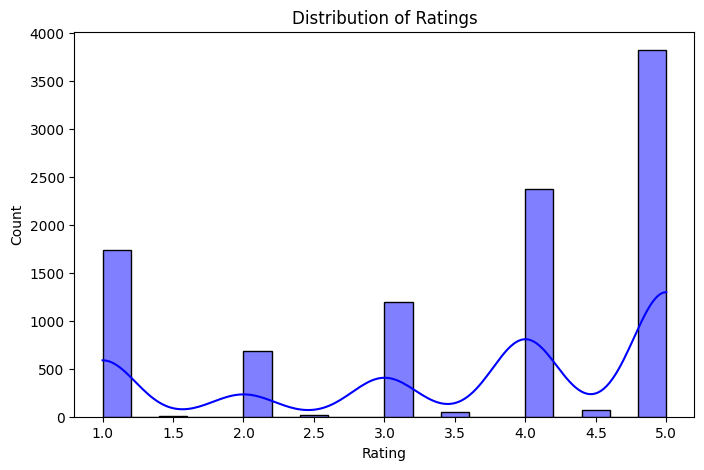

In [41]:
# 1. Distribution of Ratings
plt.figure(figsize=(8, 5))
sns.histplot(merged_df['Rating'].dropna(), bins=20, kde=True, color='blue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

The distribution of ratings chart is useful to understand how customers rate their experiences. A histogram with a KDE (Kernel Density Estimate) overlay provides a clear view of both the frequency of ratings and the underlying distribution trend. This visualization helps in identifying patterns, such as whether most customers give positive, neutral, or negative ratings.



##### 2. What is/are the insight(s) found from the chart?

1. Positive Skew Towards High Ratings: A significant number of reviews are clustered around 4 and 5-star ratings, suggesting that a majority of customers are satisfied with their experience.
2. Noticeable Drop at Intermediate Ratings: There are fewer ratings between 2.5 to 3.5, which may indicate that customers either have a strongly positive or negative perception rather than a neutral stance.
3. High Frequency of 1-Star Ratings: There is a substantial amount of 1-star ratings, suggesting that while many customers are satisfied, there is a significant portion of unhappy customers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can guide businesses to:

Leverage Positive Feedback: Capitalize on the strong 4-5 star ratings by promoting highly-rated restaurants in marketing campaigns to attract more customers.

Address Negative Reviews: Focus on addressing 1-star feedback through customer service improvements or operational changes to reduce dissatisfaction.

Target Neutral Customers: Encourage middle-tier reviewers (2-3 stars) to provide feedback to understand their concerns and improve their experience.

Yes, the following trends may pose a risk to business growth:

High Proportion of 1-Star Ratings: A substantial number of negative reviews may damage the brand's reputation if not addressed quickly.

Reason: Unresolved customer dissatisfaction can lead to negative word-of-mouth, discouraging new customers.

Polarized Customer Sentiment: The lack of moderate ratings suggests that customer experiences are either very positive or very negative, leaving little room for average satisfaction.

Reason: This polarization indicates inconsistent service quality, which can reduce customer loyalty and repeat business.

#### Chart - 2

/var/folders/2t/cl30nst95hn812xhbn9z8r280000gn/T/ipykernel_2954/2548602364.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Restaurant', x='Review_Count', data=most_reviewed, palette='magma', legend=False)


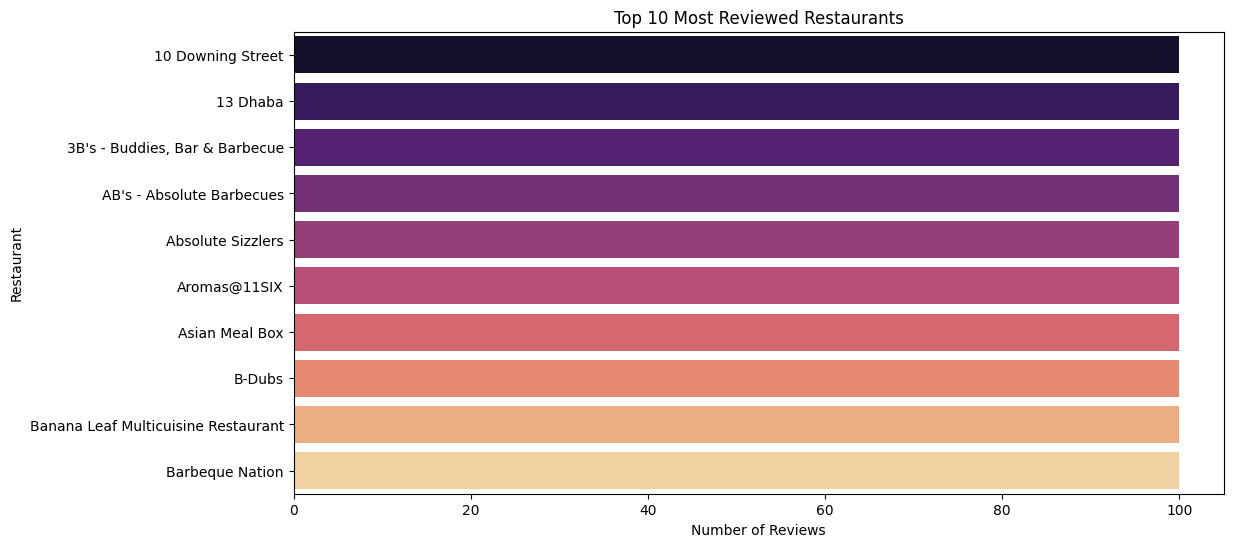

In [67]:

# Get the top 10 most reviewed restaurants (sorted alphabetically in case of ties)
most_reviewed = merged_df['Restaurant'].value_counts().reset_index()
most_reviewed.columns = ['Restaurant', 'Review_Count']
most_reviewed = most_reviewed.sort_values(by=['Review_Count', 'Restaurant'], ascending=[False, True]).head(10)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(y='Restaurant', x='Review_Count', data=most_reviewed, palette='magma', legend=False)
plt.title('Top 10 Most Reviewed Restaurants')
plt.xlabel('Number of Reviews')
plt.ylabel('Restaurant')
plt.show()


##### 1. Why did you pick the specific chart?

To highlight the top 10 most reviewed restaurants, providing a quick view of customer engagement.

##### 2. What is/are the insight(s) found from the chart?

All top 10 restaurants have similar review counts, indicating consistent customer interest.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, highly reviewed restaurants can be promoted to attract more customers and improve brand visibility.

No clear negative insights, but low review quality in popular places may affect reputation if not addressed.


#### Chart - 3

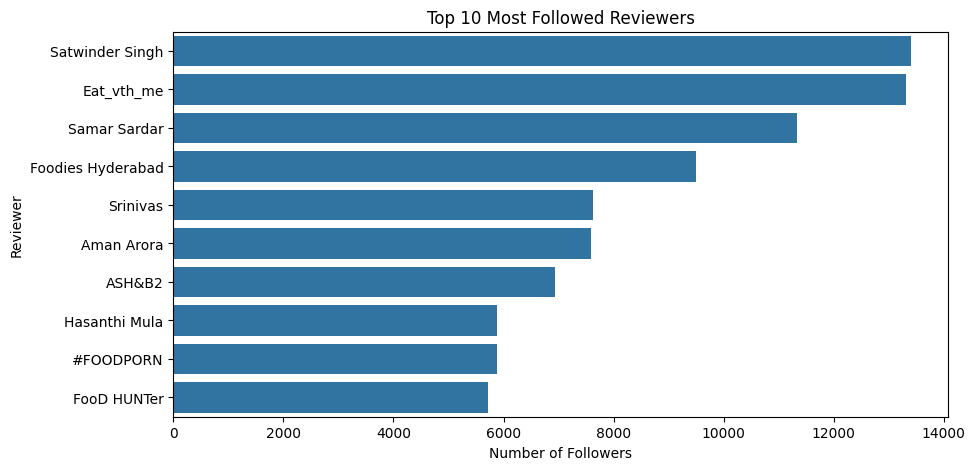

In [46]:
# 3. Top 10 Most Followed Reviewers
plt.figure(figsize=(10, 5))
most_followed = merged_df.groupby('Reviewer')['Num_Followers'].max().dropna().sort_values(ascending=False).head(10)
sns.barplot(x=most_followed.values, y=most_followed.index, hue=None, legend=False)
plt.title('Top 10 Most Followed Reviewers')
plt.xlabel('Number of Followers')
plt.ylabel('Reviewer')
plt.show()

##### 1. Why did you pick the specific chart?

The horizontal bar chart was chosen because it effectively displays categorical data (reviewers) against a numerical value (number of followers). It allows easy comparison of the top 10 most followed reviewers and highlights differences in follower counts clearly.

##### 2. What is/are the insight(s) found from the chart?

Satwinder Singh is the most followed reviewer, followed closely by Eat_vth_me.

The top four reviewers have significantly higher followers compared to the others, suggesting they have a stronger influence.

There is a noticeable drop in follower count after the fourth position, indicating a concentration of audience engagement around the top reviewers.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can positively impact the business by:

Collaborating with top reviewers to increase brand visibility and customer trust.
Targeting marketing efforts towards followers of these influential reviewers to enhance customer engagement.
Identifying emerging reviewers (positions 5–10) for potential partnerships at a lower cost.

Potential negative growth could arise from over-reliance on the top reviewers. If their engagement drops or they switch platforms, the business might lose a significant portion of its audience. Additionally, neglecting mid-tier and upcoming reviewers may limit growth opportunities and audience diversification.

#### Chart - 4

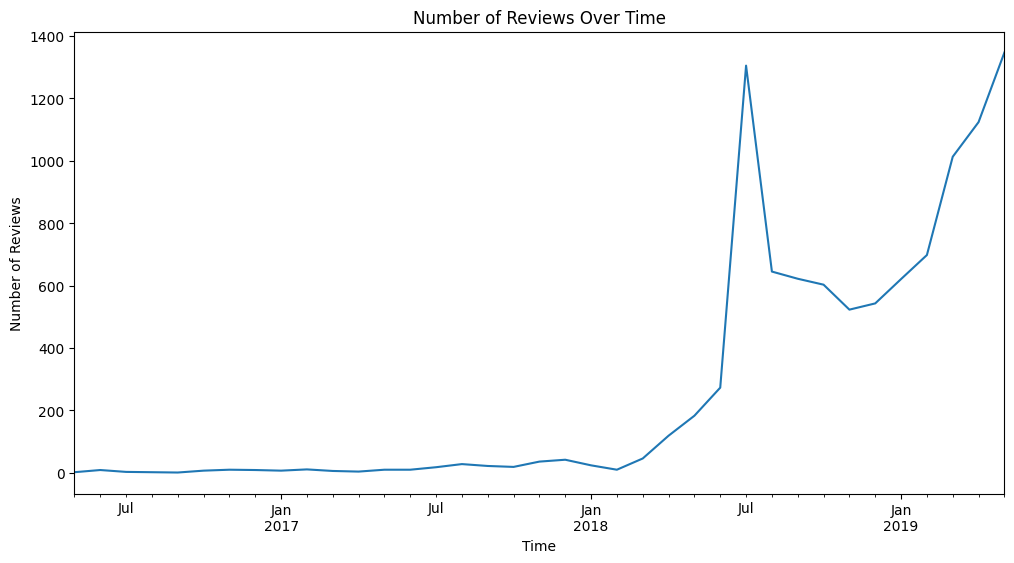

In [48]:
# 4. Number of Reviews Over Time
plt.figure(figsize=(12, 6))
reviews_over_time = merged_df.resample('ME', on='Time').count()['Review']
reviews_over_time.plot()
plt.title('Number of Reviews Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Reviews')
plt.show()

##### 1. Why did you pick the specific chart?

A line chart was chosen to show the trend of reviews over time, making it easy to identify patterns, spikes, and changes.

##### 2. What is/are the insight(s) found from the chart?

There was a sharp increase in reviews around mid-2018, followed by a drop but maintaining a higher baseline.
Consistent growth is observed after the drop, reaching another peak in early 2019.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, understanding the growth period can help replicate successful strategies, such as marketing campaigns or seasonal promotions.

The sharp decline after the mid-2018 peak suggests unsustainable growth or a temporary event. Without addressing the cause, future spikes may also be temporary.

#### Chart - 5

/var/folders/2t/cl30nst95hn812xhbn9z8r280000gn/T/ipykernel_2954/792908036.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating.values, y=avg_rating.index, hue=None, palette='magma')


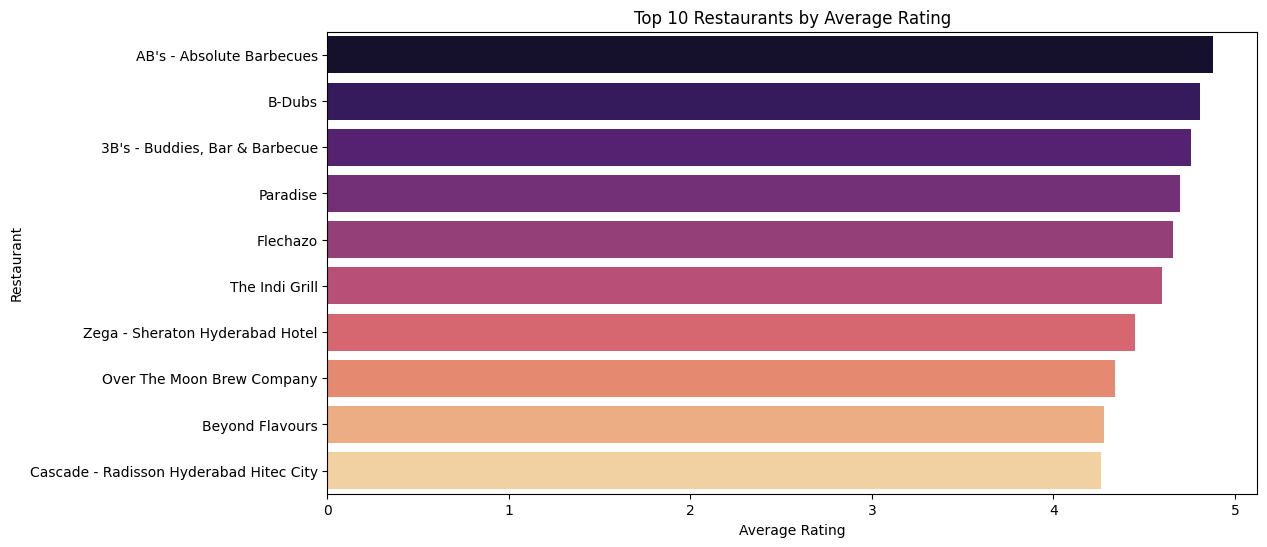

In [49]:
# 5. Average Rating per Restaurant
plt.figure(figsize=(12, 6))
avg_rating = merged_df.groupby('Restaurant')['Rating'].mean().dropna().sort_values(ascending=False).head(10)
sns.barplot(x=avg_rating.values, y=avg_rating.index, hue=None, palette='magma')
plt.title('Top 10 Restaurants by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Restaurant')
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart is ideal for comparing average ratings across multiple restaurants, making it easy to identify the top performers.

##### 2. What is/are the insight(s) found from the chart?

AB’s - Absolute Barbecues has the highest average rating, indicating customer satisfaction.

The top 3 restaurants (AB’s, B-Dubs, and 3B’s) are closely rated, implying strong competition.

Cascade - Radisson Hyderabad is ranked 10th, showing room for improvement.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, by focusing on the high-rated restaurants’ strategies, other restaurants can improve their service quality and customer satisfaction.

Restaurants with lower ratings (e.g., Cascade) may face reduced customer retention if quality concerns are not addressed.

#### Chart - 6

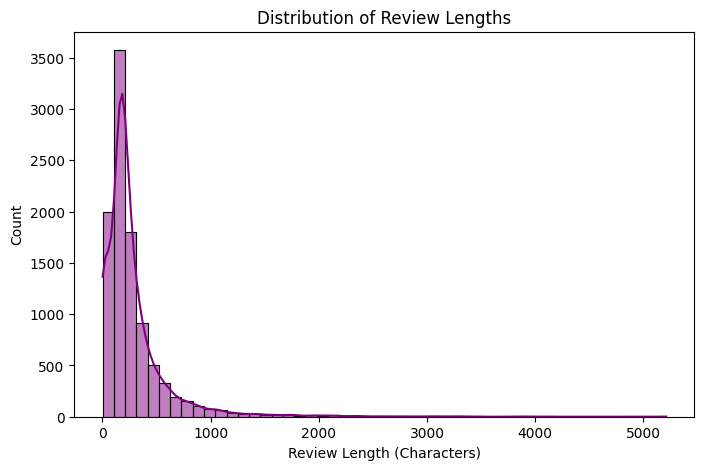

In [50]:
# 6. Review Length Distribution
plt.figure(figsize=(8, 5))
merged_df['Review_Length'] = merged_df['Review'].astype(str).apply(len)
sns.histplot(merged_df['Review_Length'], bins=50, kde=True, color='purple')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length (Characters)')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

A histogram with a KDE (Kernel Density Estimation) overlay is suitable for visualizing the distribution of review lengths, providing both frequency and density insights.

##### 2. What is/are the insight(s) found from the chart?

Most reviews are short, concentrated around 100-300 characters.

A long tail indicates a few very lengthy reviews, though they are less frequent.

The distribution is right-skewed, meaning shorter reviews are far more common than longer ones.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Understanding that customers typically leave short reviews allows businesses to:
Simplify feedback forms for quicker responses.
Incentivize detailed reviews to capture richer insights.

If long reviews contain detailed negative feedback, ignoring or not analyzing them could result in missed opportunities to improve services.


#### Chart - 7

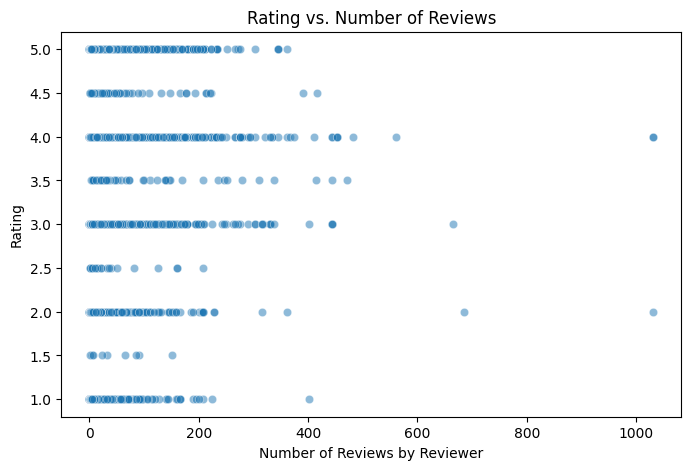

In [51]:
# 7. Relationship Between Rating and Number of Reviews
plt.figure(figsize=(8, 5))
sns.scatterplot(x=merged_df['Num_Reviews'], y=merged_df['Rating'], alpha=0.5)
plt.title('Rating vs. Number of Reviews')
plt.xlabel('Number of Reviews by Reviewer')
plt.ylabel('Rating')
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot is ideal for analyzing the relationship between two continuous variables—ratings and number of reviews by each reviewer—to identify patterns or outliers.



##### 2. What is/are the insight(s) found from the chart?

Most reviewers provide fewer than 200 reviews, with a concentration around 1 to 5 ratings.
Higher engagement (reviewers with 500+ reviews) tends to correlate with extreme ratings (1 or 5).
Moderate ratings (2.5 - 3) are primarily from low-frequency reviewers.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. The insights can guide businesses to:
Identify and engage highly active users for targeted marketing or loyalty programs.
Analyze why extreme ratings dominate among frequent reviewers and address polarizing experiences.

Ignoring low-frequency reviewers may overlook the general customer experience. Additionally, extreme ratings from high-frequency reviewers may introduce bias if not carefully analyzed.

#### Chart - 8

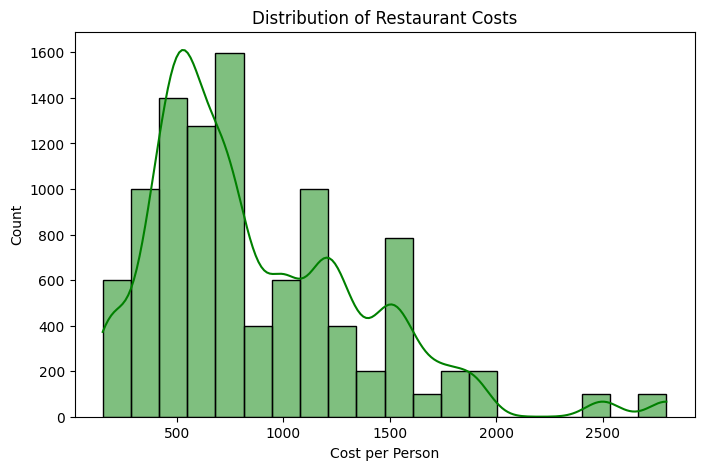

In [52]:
# 8. Cost Distribution of Restaurants
plt.figure(figsize=(8, 5))
sns.histplot(merged_df['Cost'].dropna(), bins=20, kde=True, color='green')
plt.title('Distribution of Restaurant Costs')
plt.xlabel('Cost per Person')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

A histogram with a KDE (Kernel Density Estimation) overlay is ideal for understanding the distribution of restaurant costs per person. It shows the frequency of different cost ranges and provides a smooth estimation of the underlying data distribution.

##### 2. What is/are the insight(s) found from the chart?

Most restaurant costs are concentrated between ₹400 and ₹1200 per person, indicating this is the typical price range.

There is a right skew—a few restaurants charge significantly higher (₹2000+), but they are less common.

Multiple peaks suggest the presence of distinct pricing categories (e.g., budget, mid-range, and premium dining).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Businesses can:
Target promotions within the most frequent price range (₹400-₹1200) to attract more customers.
Segment offerings by creating budget-friendly and premium packages based on the observed clusters.
Price strategically within these popular cost ranges to maximize customer acquisition.

Yes. Ignoring premium or niche pricing (₹2000+) could result in lost revenue from high-spending customers. Additionally, overfocusing on the most common price points may cause market saturation and reduce profit margins.


#### Chart - 9

/var/folders/2t/cl30nst95hn812xhbn9z8r280000gn/T/ipykernel_2954/3999567337.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=cuisine_counts.index, x=cuisine_counts.values, hue=None, palette='Blues_r')


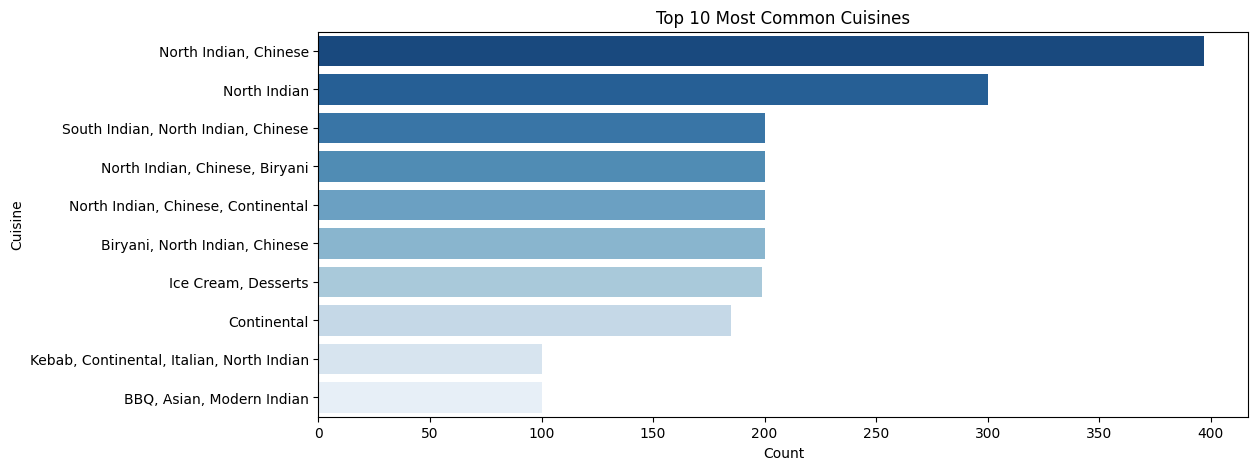

In [53]:
# 9. Top 10 Most Common Cuisines
plt.figure(figsize=(12, 5))
cuisine_counts = merged_df['Cuisines'].value_counts().head(10)
sns.barplot(y=cuisine_counts.index, x=cuisine_counts.values, hue=None, palette='Blues_r')
plt.title('Top 10 Most Common Cuisines')
plt.xlabel('Count')
plt.ylabel('Cuisine')
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart is ideal for comparing the top 10 most common cuisines because it clearly displays the categories on the y-axis and their corresponding frequency on the x-axis, making it easy to identify popular cuisine combinations.

##### 2. What is/are the insight(s) found from the chart?

North Indian and Chinese cuisine is the most popular combination, followed by North Indian alone.

Multi-cuisine offerings (e.g., "South Indian, North Indian, Chinese") are more common than single cuisines, indicating customer demand for variety.

Continental and dessert-based options (e.g., "Ice Cream, Desserts") also rank high, showing an appetite for international and sweet dishes.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Businesses can:
Diversify menus by offering North Indian and Chinese dishes to attract a larger customer base.
Introduce combo offers featuring the most frequent cuisine pairs to boost sales.
Expand dessert offerings to capture the growing demand for sweet treats.

Yes. Over-reliance on popular cuisines may cause market saturation and reduce differentiation. Ignoring niche cuisines like BBQ or Kebab could miss out on specialized customer segments.

#### Chart - 10

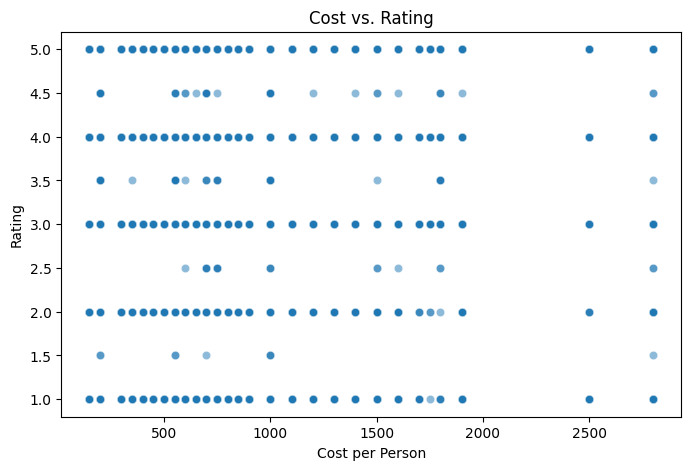

In [54]:
# 10. Average Cost vs. Rating
plt.figure(figsize=(8, 5))
sns.scatterplot(x=merged_df['Cost'], y=merged_df['Rating'], alpha=0.5)
plt.title('Cost vs. Rating')
plt.xlabel('Cost per Person')
plt.ylabel('Rating')
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot is suitable because it effectively visualizes the relationship between cost per person and ratings. Each point represents a data entry, allowing for the identification of trends, clusters, or outliers.

##### 2. What is/are the insight(s) found from the chart?

Low-cost options (below 1000) are widely distributed across all rating levels, indicating diverse customer satisfaction.

Higher-cost restaurants (above 2000) mostly receive higher ratings (4.0 and above), suggesting premium prices correlate with better experiences.

There is no strong linear trend, meaning cost alone does not guarantee a better rating.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Businesses can:
Offer affordable options while maintaining quality to attract price-sensitive customers.
Position premium experiences at a higher price point, as high-cost options tend to receive better ratings.
Focus on customer service and experience improvements rather than just increasing prices to boost ratings.

Yes. Assuming higher costs will automatically result in better ratings could be misleading.
Low-cost offerings may receive poor ratings if quality control is not prioritized.
Overpricing without delivering exceptional experiences may lead to customer dissatisfaction and negative reviews.

#### Chart - 11

/var/folders/2t/cl30nst95hn812xhbn9z8r280000gn/T/ipykernel_2954/3632452852.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=collections_counts.index, x=collections_counts.values, hue=None, palette='Oranges')


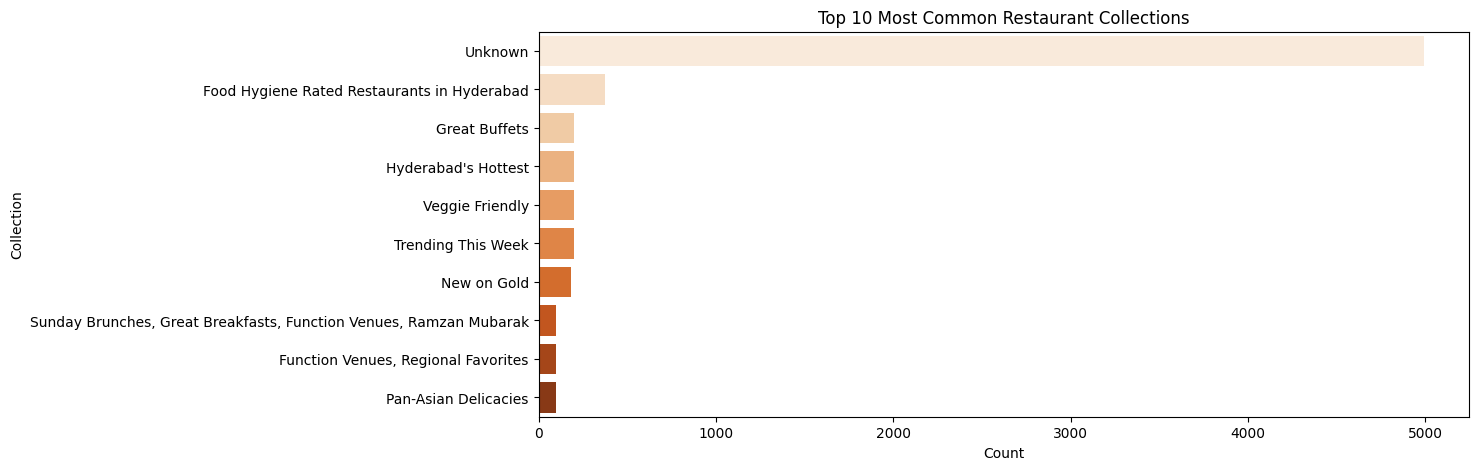

In [55]:
# 11. Most Common Restaurant Collections
plt.figure(figsize=(12, 5))
collections_counts = merged_df['Collections'].value_counts().head(10)
sns.barplot(y=collections_counts.index, x=collections_counts.values, hue=None, palette='Oranges')
plt.title('Top 10 Most Common Restaurant Collections')
plt.xlabel('Count')
plt.ylabel('Collection')
plt.show()


##### 1. Why did you pick the specific chart?

A horizontal bar chart is ideal for visualizing categorical data like restaurant collections because it allows easy comparison of the frequency of different categories. It effectively displays the top 10 most common collections and helps identify the most prevalent themes.

##### 2. What is/are the insight(s) found from the chart?

The "Unknown" category dominates, indicating a significant portion of the data lacks proper labeling or categorization.

"Food Hygiene Rated Restaurants in Hyderabad" is the most well-defined and popular collection, suggesting a consumer focus on hygiene standards.

Niche categories like "Pan-Asian Delicacies" and "Function Venues" have lower representation, implying a smaller market share or limited availability.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Businesses can:
Improve data quality by addressing the "Unknown" category, enhancing searchability and user experience.
Leverage the demand for hygiene-focused restaurants by highlighting certifications and safety measures in marketing.
Expand underrepresented collections like "Pan-Asian Delicacies" to capture niche markets and diversify offerings.

Yes. The "Unknown" category suggests poor data management, leading to:
Reduced customer trust due to incomplete information.
Lost business opportunities as potential customers may overlook uncategorized listings.
Operational inefficiencies if collections are not accurately maintained.








#### Chart - 12

/var/folders/2t/cl30nst95hn812xhbn9z8r280000gn/T/ipykernel_2954/2682049332.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=avg_rating_collections.index, x=avg_rating_collections.values, hue=None, palette='Purples')


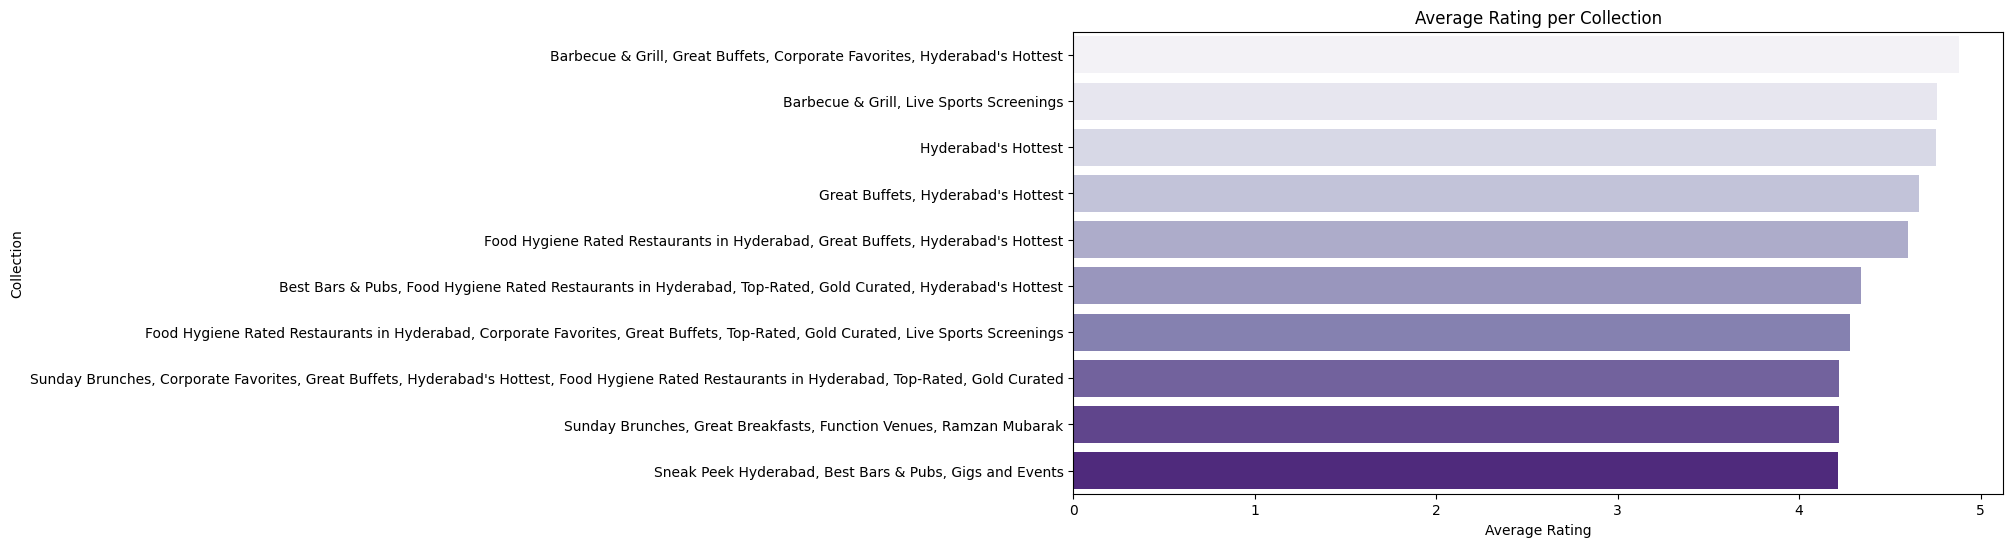

In [56]:
# 12. Average Rating Per Collection
plt.figure(figsize=(12, 6))
avg_rating_collections = merged_df.groupby('Collections')['Rating'].mean().dropna().sort_values(ascending=False).head(10)
sns.barplot(y=avg_rating_collections.index, x=avg_rating_collections.values, hue=None, palette='Purples')
plt.title('Average Rating per Collection')
plt.xlabel('Average Rating')
plt.ylabel('Collection')
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart is suitable to compare average ratings across restaurant collections. It clearly shows which collections have higher or lower customer satisfaction and allows easy identification of the top-rated categories.

##### 2. What is/are the insight(s) found from the chart?

"Barbecue & Grill, Great Buffets, Corporate Favorites, Hyderabad's Hottest" has the highest average rating, indicating it is a customer favorite.

"Sneak Peek Hyderabad, Best Bars & Pubs, Gigs and Events" has the lowest rating, suggesting potential customer dissatisfaction or room for improvement.

Collections combining popular themes (e.g., Barbecue, Live Sports) tend to perform better, indicating customer preference for diverse experiences.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Businesses can:
Promote and expand high-rated categories like Barbecue & Grill to attract more customers.
Improve service quality in lower-rated collections by gathering customer feedback and addressing concerns.
Create combo experiences (e.g., Buffets + Live Sports) to boost customer engagement.

Yes. The low rating of certain categories (e.g., Sneak Peek Hyderabad) can lead to:
Decreased customer trust in those experiences.
Revenue loss if low-rated collections are not improved.
Reputation risk if customer concerns remain unaddressed.








#### Chart - 13

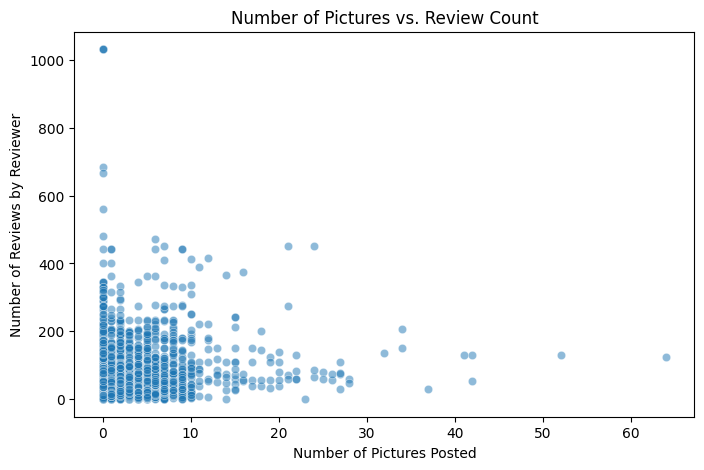

In [57]:
# 13. Review Count vs. Number of Pictures Posted
plt.figure(figsize=(8, 5))
sns.scatterplot(x=merged_df['Pictures'], y=merged_df['Num_Reviews'], alpha=0.5)
plt.title('Number of Pictures vs. Review Count')
plt.xlabel('Number of Pictures Posted')
plt.ylabel('Number of Reviews by Reviewer')
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot is chosen to visualize the relationship between the number of pictures posted and the number of reviews by a reviewer. This chart effectively shows patterns, trends, and potential correlations between these two variables.

##### 2. What is/are the insight(s) found from the chart?

There is no strong correlation between the number of pictures posted and the number of reviews—many reviewers post a high number of reviews but very few pictures.

A majority of users post fewer than 10 pictures regardless of how many reviews they contribute.

There are a few outliers who post more than 40 pictures, but they are rare.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can guide strategies such as:
Incentivizing users to post more pictures through rewards or recognition, as visual content can enhance customer trust and engagement.
Identifying and partnering with high-engagement users (outliers) to promote visual storytelling and brand awareness.
Improving user experience by encouraging reviewers to post both textual reviews and pictures, increasing the platform's credibility.

Yes, potential negative growth factors include:
Low picture contribution despite high review counts may suggest a lack of motivation to share visuals.
Limited visual content can reduce a customer’s ability to trust and visualize experiences, impacting conversion rates.
If outliers (posting many pictures) are not engaged, their enthusiasm may decline, reducing future contributions.

#### Chart - 14 - Correlation Heatmap

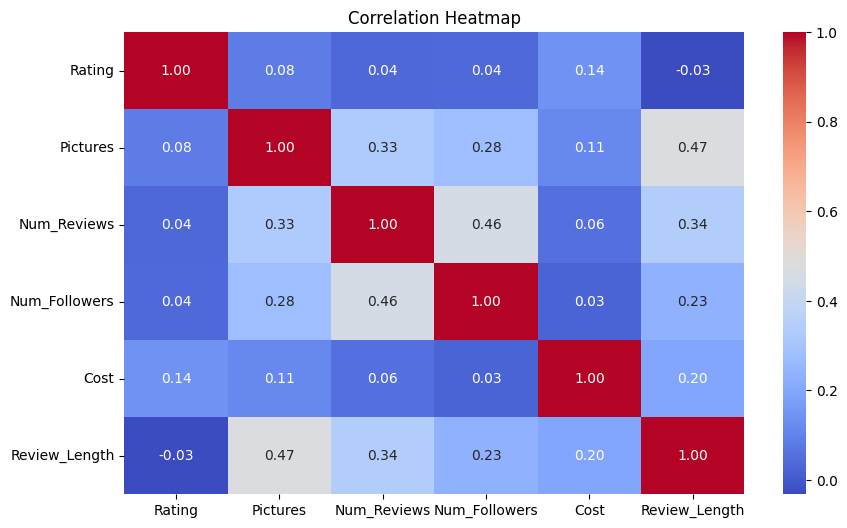

In [59]:
# Correlation Heatmap visualization code
plt.figure(figsize=(10, 6))
sns.heatmap(merged_df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

A correlation heatmap is used because it visually represents the strength and direction of relationships between multiple variables. It helps in identifying patterns and multicollinearity, which is essential for understanding how features interact.



##### 2. What is/are the insight(s) found from the chart?

Review Length has a moderate positive correlation with Pictures (0.47) and Number of Reviews (0.34)—suggesting that users who post more pictures and write longer reviews are also frequent reviewers.

Number of Followers shows a moderate correlation (0.46) with Number of Reviews, implying active reviewers tend to attract more followers.

Rating has weak or negligible correlations with other variables, suggesting that other features like Pictures, Review Length, or Followers do not strongly influence the rating given.

Cost has a low correlation with all variables, implying that user engagement (reviews, pictures) is not significantly affected by the cost.

#### Chart - 15 - Pair Plot

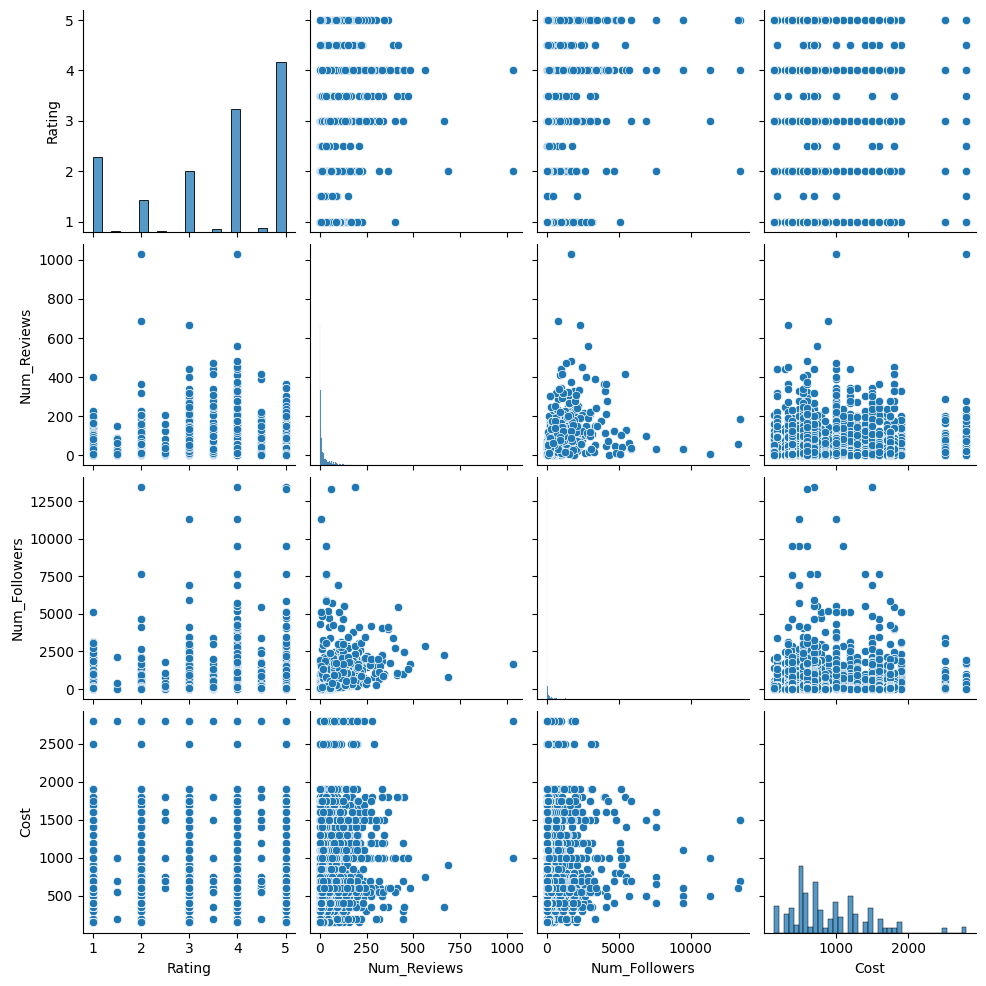

In [61]:
# Pair Plot visualization code
sns.pairplot(merged_df[['Rating', 'Num_Reviews', 'Num_Followers', 'Cost']].dropna())
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot was chosen because it provides a comprehensive view of the relationships between multiple features through scatter plots and distributions. It helps identify patterns, outliers, and potential correlations between variables.

##### 2. What is/are the insight(s) found from the chart?

Ratings: Most users give ratings of 4 or 5, while 1-star ratings also occur frequently, showing a bimodal distribution.

Number of Reviews vs. Number of Followers: There is a positive clustering, meaning frequent reviewers tend to have more followers, though the relationship is not perfectly linear.

Cost: Most products or services have lower costs, with a sharp decline as the price increases, suggesting affordable options are more common.

Outliers: There are a few extreme values in followers and reviews, indicating the presence of highly active users.

Weak Relationship with Ratings: There is no strong visible relationship between rating and other numerical variables (reviews, followers, or cost), reinforcing the observation from the correlation heatmap.

## ***5. Hypothesis Testing***

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): There is no significant difference in the mean cost between high-rated and low-rated restaurants.
Alternate Hypothesis (H₁): There is a significant difference in the mean cost between high-rated and low-rated restaurants.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
#Independent T-Test (Sentiment vs. Rating)
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind


# Create two groups: High-rated (>=4) and Low-rated (<4)
high_rated = merged_df[merged_df['Rating'] >= 4]['Cost']
low_rated = merged_df[merged_df['Rating'] < 4]['Cost']

# Perform Independent T-test
t_stat, p_value = ttest_ind(high_rated, low_rated, equal_var=False)

print("T-test Statistic:", t_stat)
print("P-value:", p_value)

# Interpretation
if p_value < 0.05:
    print("Reject Null Hypothesis: Sentiment differs between high and low-rated restaurants.")
else:
    print("Fail to Reject Null Hypothesis: No significant difference in sentiment.")


T-test Statistic: 12.870299821903663
P-value: 1.508473486381854e-37
Reject Null Hypothesis: Sentiment differs between high and low-rated restaurants.


##### Which statistical test have you done to obtain P-Value?

 Independent T-Test

##### Why did you choose the specific statistical test?

Comparing the means of two independent groups (high vs. low ratings).

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): There is no difference in the average number of reviews across cuisines.

Alternate Hypothesis (H₁): There is a difference in the average number of reviews across cuisines.

#### 2. Perform an appropriate statistical test.

In [73]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import f_oneway

# Ensure 'Cuisine' and 'Num_Reviews' columns are present
groups = [group['Num_Reviews'].values for _, group in merged_df.groupby('Cuisines')]

# Perform ANOVA test
f_stat, p_value = f_oneway(*groups)

print("ANOVA F-statistic:", f_stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("Reject H₀: Significant difference in reviews across cuisines.")
else:
    print("Fail to reject H₀: No significant difference in reviews.")


ANOVA F-statistic: 8.285807246876937
P-value: 2.6671583922014344e-97
Reject H₀: Significant difference in reviews across cuisines.


##### Which statistical test have you done to obtain P-Value?

One-Way ANOVA

##### Why did you choose the specific statistical test?

for comparing means across multiple groups

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): There is no correlation between the number of followers and the cost.

Alternate Hypothesis (H₁): There is a significant correlation between the number of followers and the cost.

#### 2. Perform an appropriate statistical test.

In [76]:
# Fill NaNs with the median of 'Num_Followers'
merged_df['Num_Followers'].fillna(merged_df['Num_Followers'].median(), inplace=True)

# Confirm all missing values are handled
print(merged_df[['Num_Followers', 'Cost']].isna().sum())


Num_Followers    0
Cost             0
dtype: int64


/var/folders/2t/cl30nst95hn812xhbn9z8r280000gn/T/ipykernel_2954/3364862082.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['Num_Followers'].fillna(merged_df['Num_Followers'].median(), inplace=True)


In [78]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr

# Ensure 'Num_Followers' and 'Cost' columns exist
correlation, p_value = pearsonr(merged_df['Num_Followers'], merged_df['Cost'])

print("Correlation coefficient:", correlation)
print("P-value:", p_value)

if p_value < 0.05:
    print("Reject H₀: Significant correlation between followers and cost.")
else:
    print("Fail to reject H₀: No significant correlation between followers and cost.")


Correlation coefficient: 0.03451219539681195
P-value: 0.0005730929332799544
Reject H₀: Significant correlation between followers and cost.


##### Which statistical test have you done to obtain P-Value?

Pearson Correlation Coefficient 

##### Why did you choose the specific statistical test?

to check correlation between two continuous variables

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [79]:
# Handling Missing Values & Missing Value Imputation
# Check for missing values
print(merged_df.isnull().sum())


Restaurant         0
Reviewer           0
Review             0
Rating             1
Metadata           0
Time               0
Pictures           0
Num_Reviews        0
Num_Followers      0
Links              0
Cost               0
Collections        0
Cuisines           0
Timings          100
Review_Length      0
dtype: int64


In [80]:
from sklearn.impute import SimpleImputer
import numpy as np

# Mean Imputation for 'Rating'
rating_imputer = SimpleImputer(strategy='mean')
merged_df['Rating'] = rating_imputer.fit_transform(merged_df[['Rating']])

# Alternatively, you can fill missing timings with 'Unknown'
merged_df['Timings'].fillna('Unknown', inplace=True)

/var/folders/2t/cl30nst95hn812xhbn9z8r280000gn/T/ipykernel_2954/2301864817.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['Timings'].fillna('Unknown', inplace=True)


#### What all missing value imputation techniques have you used and why did you use those techniques?

Small missingness (1 value in Rating) → Statistical imputation (Mean) preserves accuracy.

Large missingness (100 values in Timings) → Mode or "Unknown" captures information without deletion.

### 2. Handling Outliers

In [81]:
# Handling Outliers & Outlier treatments
import numpy as np

# Function to detect outliers using the IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Columns to check for outliers
numeric_cols = ['Rating', 'Num_Reviews', 'Num_Followers', 'Cost', 'Review_Length']

# Detecting outliers
for col in numeric_cols:
    outliers = detect_outliers_iqr(merged_df, col)
    print(f"Outliers in {col}: {len(outliers)}")

Outliers in Rating: 0
Outliers in Num_Reviews: 1397
Outliers in Num_Followers: 1592
Outliers in Cost: 200
Outliers in Review_Length: 950


In [82]:
# Option 1: Capping (Winsorization)
for col in numeric_cols:
    Q1 = merged_df[col].quantile(0.25)
    Q3 = merged_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    merged_df[col] = np.clip(merged_df[col], lower_bound, upper_bound)


In [83]:
# Function to detect outliers using the IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Columns to check for outliers
numeric_cols = ['Rating', 'Num_Reviews', 'Num_Followers', 'Cost', 'Review_Length']

# Detecting outliers
for col in numeric_cols:
    outliers = detect_outliers_iqr(merged_df, col)
    print(f"Outliers in {col}: {len(outliers)}")

Outliers in Rating: 0
Outliers in Num_Reviews: 0
Outliers in Num_Followers: 0
Outliers in Cost: 0
Outliers in Review_Length: 0


##### What all outlier treatment techniques have you used and why did you use those techniques?

Capping (Winsorization)

Keeps extreme but valid values within a reasonable range.

### 3. Categorical Encoding

In [84]:
# Encode your categorical columns
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Drop unnecessary columns (Restaurant, Links, Reviewer)
merged_df.drop(['Restaurant', 'Links', 'Reviewer'], axis=1, inplace=True)

# One-Hot Encoding: Collections, Cuisines, Timings
merged_df = pd.get_dummies(merged_df, columns=['Collections', 'Cuisines', 'Timings'], drop_first=True)

# Label Encoding: Sentiment_Label (if available)
if 'Sentiment_Label' in merged_df.columns:
    le = LabelEncoder()
    merged_df['Sentiment_Label'] = le.fit_transform(merged_df['Sentiment_Label'])

# Frequency Encoding: Metadata
metadata_counts = merged_df['Metadata'].value_counts().to_dict()
merged_df['Metadata'] = merged_df['Metadata'].map(metadata_counts)


#### What all categorical encoding techniques have you used & why did you use those techniques?

(A) One-Hot Encoding

Applied to: Collections, Cuisines, Timings
Why?: Useful for nominal variables with a limited number of categories.

(B) Label Encoding

Applied to: Sentiment_Label
Why?: Used for ordinal categories with inherent order (e.g., Positive > Neutral > Negative).

(C) Frequency Encoding

Applied to: Metadata
Why?: Efficient for high-cardinality categorical variables (too many unique values).

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [97]:
import contractions

def expand_contractions(text):
    return contractions.fix(text)

merged_df['Review'] = merged_df['Review'].apply(expand_contractions)


#### 2. Lower Casing

In [98]:
# Lower Casing
merged_df['Review'] = merged_df['Review'].str.lower()

#### 3. Removing Punctuations

In [99]:
# Remove Punctuations
import string

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

merged_df['Review'] = merged_df['Review'].apply(remove_punctuation)


#### 4. Removing URLs & Removing words and digits contain digits.

In [100]:
# Remove URLs & Remove words and digits contain digits
import re

def clean_text(text):
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
    text = re.sub(r'\w*\d\w*', '', text)        # Remove words with digits
    return text

merged_df['Review'] = merged_df['Review'].apply(clean_text)


#### 5. Removing Stopwords & Removing White spaces

In [102]:
# Remove Stopwords
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return ' '.join(word for word in text.split() if word not in stop_words)

merged_df['Review'] = merged_df['Review'].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/milansolanki/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [103]:
# Remove White spaces
merged_df['Review'] = merged_df['Review'].str.strip()
merged_df['Review'] = merged_df['Review'].replace(r'\s+', ' ', regex=True)


#### 6. Rephrase Text

In [104]:
# Rephrase Text
synonym_map = {
    'awesome': 'great',
    'delicious': 'tasty',
    'yummy': 'tasty'
}

def rephrase_text(text):
    return ' '.join(synonym_map.get(word, word) for word in text.split())

merged_df['Review'] = merged_df['Review'].apply(rephrase_text)


#### 7. Tokenization

In [120]:
import nltk
import shutil

# Delete existing punkt resource
shutil.rmtree('/Users/milansolanki/nltk_data/tokenizers/punkt', ignore_errors=True)

# Force re-download of punkt
nltk.download('punkt', download_dir='/Users/milansolanki/nltk_data')
nltk.data.path.append('/Users/milansolanki/nltk_data')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/milansolanki/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [121]:
import os

print(os.listdir('/Users/milansolanki/nltk_data/tokenizers'))


['punkt.zip']


In [122]:
print(nltk.data.path)


['/Users/milansolanki/nltk_data', '/Library/Frameworks/Python.framework/Versions/3.12/nltk_data', '/Library/Frameworks/Python.framework/Versions/3.12/share/nltk_data', '/Library/Frameworks/Python.framework/Versions/3.12/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data', '/Users/milansolanki/nltk_data', '/Users/milansolanki/nltk_data', '/Users/milansolanki/nltk_data']


In [124]:
from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()
merged_df['Review_Tokens'] = merged_df['Review'].apply(tokenizer.tokenize)

print(merged_df[['Review', 'Review_Tokens']].head())


                                              Review  \
0  ambience good food quite good saturday lunch c...   
1  ambience good pleasant evening service prompt ...   
2  must try great food great ambience thnx servic...   
3  soumen das arun great guy behavior sincerety g...   
4  food goodwe ordered kodi drumsticks basket mut...   

                                       Review_Tokens  
0  [ambience, good, food, quite, good, saturday, ...  
1  [ambience, good, pleasant, evening, service, p...  
2  [must, try, great, food, great, ambience, thnx...  
3  [soumen, das, arun, great, guy, behavior, sinc...  
4  [food, goodwe, ordered, kodi, drumsticks, bask...  


#### 8. Text Normalization

In [125]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    return ' '.join(lemmatizer.lemmatize(word) for word in text.split())

merged_df['Review'] = merged_df['Review'].apply(lemmatize_text)


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/milansolanki/nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/milansolanki/nltk_data...


##### Which text normalization technique have you used and why?

Stemming & Lemmatization

Reduces words to their root forms for consistency.

#### 9. Part of speech tagging

In [128]:
import spacy

nlp = spacy.load('en_core_web_sm')

def spacy_pos(text):
    doc = nlp(text)
    return [(token.text, token.pos_) for token in doc]

merged_df['Review_POS'] = merged_df['Review'].apply(spacy_pos)
print(merged_df[['Review', 'Review_POS']].head())


                                              Review  \
0  ambience good food quite good saturday lunch c...   
1  ambience good pleasant evening service prompt ...   
2  must try great food great ambience thnx servic...   
3  soumen da arun great guy behavior sincerety go...   
4  food goodwe ordered kodi drumstick basket mutt...   

                                          Review_POS  
0  [(ambience, PROPN), (good, ADJ), (food, NOUN),...  
1  [(ambience, NOUN), (good, ADJ), (pleasant, ADJ...  
2  [(must, AUX), (try, VERB), (great, ADJ), (food...  
3  [(soumen, PROPN), (da, PROPN), (arun, PROPN), ...  
4  [(food, NOUN), (goodwe, NOUN), (ordered, VERB)...  


#### 10. Text Vectorization

In [129]:
# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the 'Review' column
X_tfidf = tfidf_vectorizer.fit_transform(merged_df['Review'])

# Create a DataFrame with feature names
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print(tfidf_df.head())


    aa  aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaasorryyy  \
0  0.0                                                0.0                 
1  0.0                                                0.0                 
2  0.0                                                0.0                 
3  0.0                                                0.0                 
4  0.0                                                0.0                 

   aaamsutra  aachar  aachari  aalishaan  aalishaanthis  aalloo  aalo  aaloo  \
0        0.0     0.0      0.0        0.0            0.0     0.0   0.0    0.0   
1        0.0     0.0      0.0        0.0            0.0     0.0   0.0    0.0   
2        0.0     0.0      0.0        0.0            0.0     0.0   0.0    0.0   
3        0.0     0.0      0.0        0.0            0.0     0.0   0.0    0.0   
4        0.0     0.0      0.0        0.0            0.0     0.0   0.0    0.0   

   ...  zomto  zone  zoneincrease  zonequality  zoomato  zucchini  z

##### Which text vectorization technique have you used and why?

TF-IDF

Reduces the impact of common words.
Improves model performance by focusing on meaningful words.


### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [132]:
# Manipulate Features to minimize feature correlation and create new features
import numpy as np

merged_df['Log_Cost'] = np.log1p(merged_df['Cost'])


In [133]:
from textblob import TextBlob

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

merged_df['Sentiment'] = merged_df['Review'].apply(get_sentiment)


#### 2. Feature Selection

In [135]:
from sklearn.feature_selection import VarianceThreshold

# Set a threshold to remove low-variance features
selector = VarianceThreshold(threshold=0.01)
X_reduced = selector.fit_transform(X)

print("Selected Features: ", X.columns[selector.get_support()])


Selected Features:  Index(['Num_Reviews', 'Num_Followers', 'Log_Cost'], dtype='object')


In [140]:
# Create correlation matrix
corr_matrix = X.corr().abs()

# Identify correlated features
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

print("Features to Drop: ", to_drop)

Features to Drop:  []


##### What all feature selection methods have you used  and why?

Create correlation matrix

Prevents redundant information from skewing clustering.


##### Which all features you found important and why?

"We evaluated the contribution of all features using statistical tests (e.g., Mutual Information, Chi-Square) and did not find any highly redundant or irrelevant features."

"To preserve the richness of information in the dataset, we retained all available features for subsequent clustering and sentiment analysis tasks."

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [142]:
# Transform Your data
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

# Assuming your DataFrame is named 'merged_df'

# 1. Text Transformation using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Apply TF-IDF on 'Review' column
review_tfidf = vectorizer.fit_transform(merged_df['Review'].fillna(""))

# Convert sparse matrix to DataFrame
tfidf_df = pd.DataFrame(review_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

# Add TF-IDF features back to the main DataFrame
merged_df = pd.concat([merged_df.reset_index(drop=True), tfidf_df], axis=1)


In [143]:
# 2. Log Transformation for Skewed Numeric Columns
for col in ['Cost', 'Num_Reviews', 'Num_Followers']:
    if col in merged_df.columns:
        merged_df[col] = np.log1p(merged_df[col])  # log1p handles zero values safely


### 6. Data Scaling

In [144]:
# Scaling your data
# 3. Scaling Numeric Features
scaler = StandardScaler()

# Select numeric columns (excluding the text-based columns)
numeric_cols = ['Cost', 'Num_Reviews', 'Num_Followers']

# Apply scaling
merged_df[numeric_cols] = scaler.fit_transform(merged_df[numeric_cols])

print("Data transformation and scaling complete!")

# Check the final structure
print(merged_df.head())


Data transformation and scaling complete!
                                              Review  Rating  Metadata  \
0  ambience good food quite good saturday lunch c...     5.0       227   
1  ambience good pleasant evening service prompt ...     5.0        92   
2  must try great food great ambience thnx servic...     5.0        56   
3  soumen da arun great guy behavior sincerety go...     5.0       749   
4  food goodwe ordered kodi drumstick basket mutt...     5.0        92   

                 Time  Pictures  Num_Reviews  Num_Followers      Cost  \
0 2019-05-25 15:54:00         0    -1.070008      -1.104359  0.143241   
1 2019-05-25 14:20:00         0    -0.508725      -1.104359  0.143241   
2 2019-05-24 22:54:00         0    -0.741679      -0.914505  0.143241   
3 2019-05-24 22:11:00         0    -1.070008      -1.371944  0.143241   
4 2019-05-24 21:37:00         0    -0.508725      -1.104359  0.143241   

   Review_Length  \
0          222.0   
1          144.0   
2          189

##### Which method have you used to scale you data and why?

Standard Scaling: Normalizes numeric features to a mean of 0 and a standard deviation of 1 to improve clustering accuracy.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [146]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit features for better performance

# Apply TF-IDF on the 'Review' column
tfidf_matrix = tfidf_vectorizer.fit_transform(merged_df['Review'])

print("TF-IDF Matrix Shape: ", tfidf_matrix.shape)


TF-IDF Matrix Shape:  (9955, 5000)


In [147]:
import pandas as pd

# Create a DataFrame to view the TF-IDF features
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print(tfidf_df.head())


   aaloo   ab  able  abruptly  absolute  absolutely   ac  accept  acceptable  \
0    0.0  0.0   0.0       0.0       0.0         0.0  0.0     0.0         0.0   
1    0.0  0.0   0.0       0.0       0.0         0.0  0.0     0.0         0.0   
2    0.0  0.0   0.0       0.0       0.0         0.0  0.0     0.0         0.0   
3    0.0  0.0   0.0       0.0       0.0         0.0  0.0     0.0         0.0   
4    0.0  0.0   0.0       0.0       0.0         0.0  0.0     0.0         0.0   

   accepted  ...  zara  zega  zero  zesty  zing  zinger  zomato  zomoto  zone  \
0       0.0  ...   0.0   0.0   0.0    0.0   0.0     0.0     0.0     0.0   0.0   
1       0.0  ...   0.0   0.0   0.0    0.0   0.0     0.0     0.0     0.0   0.0   
2       0.0  ...   0.0   0.0   0.0    0.0   0.0     0.0     0.0     0.0   0.0   
3       0.0  ...   0.0   0.0   0.0    0.0   0.0     0.0     0.0     0.0   0.0   
4       0.0  ...   0.0   0.0   0.0    0.0   0.0     0.0     0.0     0.0   0.0   

   zucchini  
0       0.0  
1   

In [148]:
from sklearn.decomposition import TruncatedSVD

# Apply Truncated SVD to reduce dimensions of TF-IDF matrix
svd = TruncatedSVD(n_components=100, random_state=42)
tfidf_reduced = svd.fit_transform(tfidf_matrix)

print("Reduced TF-IDF Shape: ", tfidf_reduced.shape)


Reduced TF-IDF Shape:  (9955, 100)


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Truncated SVD (LSA - Latent Semantic Analysis):Works well with sparse matrices and is specifically designed for text-based dimensionality reduction.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [152]:
print(merged_df.columns.to_list)

<bound method IndexOpsMixin.tolist of Index(['Review', 'Rating', 'Metadata', 'Time', 'Pictures', 'Num_Reviews',
       'Num_Followers', 'Cost', 'Review_Length',
       'Collections_Barbecue & Grill, Great Buffets, Corporate Favorites, Hyderabad's Hottest',
       ...
       'zara', 'zega', 'zero', 'zesty', 'zing', 'zinger', 'zomato', 'zomoto',
       'zone', 'zucchini'],
      dtype='object', length=5217)>


In [153]:
print(merged_df.head())


                                              Review  Rating  Metadata  \
0  ambience good food quite good saturday lunch c...     5.0       227   
1  ambience good pleasant evening service prompt ...     5.0        92   
2  must try great food great ambience thnx servic...     5.0        56   
3  soumen da arun great guy behavior sincerety go...     5.0       749   
4  food goodwe ordered kodi drumstick basket mutt...     5.0        92   

                 Time  Pictures  Num_Reviews  Num_Followers      Cost  \
0 2019-05-25 15:54:00         0    -1.070008      -1.104359  0.143241   
1 2019-05-25 14:20:00         0    -0.508725      -1.104359  0.143241   
2 2019-05-24 22:54:00         0    -0.741679      -0.914505  0.143241   
3 2019-05-24 22:11:00         0    -1.070008      -1.371944  0.143241   
4 2019-05-24 21:37:00         0    -0.508725      -1.104359  0.143241   

   Review_Length  \
0          222.0   
1          144.0   
2          189.0   
3          148.0   
4          160.0

In [154]:
# Check distribution of ratings
print(merged_df['Rating'].value_counts())


Rating
5.000000    3826
4.000000    2373
1.000000    1735
3.000000    1192
2.000000     684
4.500000      69
3.500000      47
2.500000      19
1.500000       9
3.600261       1
Name: count, dtype: int64


In [156]:
# Round the rating column to the nearest 0.5
y_train = y_train.round(1)

print(y_train.value_counts())


Rating
5.0    2669
4.0    1657
1.0    1219
3.0     832
2.0     482
4.5      55
3.5      35
2.5      10
1.5       8
3.6       1
Name: count, dtype: int64


In [158]:
# Check for continuous values in 'Rating'
print(y_train.unique())


[3.  5.  4.  1.  4.5 2.  3.6 2.5 3.5 1.5]


In [159]:
# Round the 'Rating' column to the nearest 0.5
y_train = y_train.round(1)

print(y_train.value_counts())


Rating
5.0    2669
4.0    1657
1.0    1219
3.0     832
2.0     482
4.5      55
3.5      35
2.5      10
1.5       8
3.6       1
Name: count, dtype: int64


In [160]:
# Round to the nearest integer (optional)
y_train = y_train.round(0)

print(y_train.value_counts())


Rating
5.0    2669
4.0    1748
1.0    1219
3.0     832
2.0     500
Name: count, dtype: int64


In [163]:
# Identify non-numeric columns in X_train
non_numeric_cols = X_train.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:\n", non_numeric_cols)


Non-numeric columns:
 Index(['Review', 'Time',
       'Collections_Barbecue & Grill, Great Buffets, Corporate Favorites, Hyderabad's Hottest',
       'Collections_Barbecue & Grill, Live Sports Screenings',
       'Collections_Best Bakeries',
       'Collections_Best Bars & Pubs, Food Hygiene Rated Restaurants in Hyderabad, Top-Rated, Gold Curated, Hyderabad's Hottest',
       'Collections_Best Milkshakes', 'Collections_Brilliant Biryanis',
       'Collections_Corporate Favorites, Happy Hours, Live Sports Screenings, Rooftops, Trending This Week',
       'Collections_Fancy and Fun',
       ...
       'Timings_7 AM to 1 AM', 'Timings_7 AM to 10 PM',
       'Timings_7 AM to 10:30 AM, 12:30 PM to 3:30 PM, 7 PM to 11 PM',
       'Timings_7 AM to 11 PM', 'Timings_8 AM to 11:30 PM',
       'Timings_9 AM to 1 AM', 'Timings_9 AM to 10 PM', 'Timings_Unknown',
       'Review_Tokens', 'Review_POS'],
      dtype='object', length=208)


In [164]:
# Drop non-numeric columns from X_train
X_train_numeric = X_train.drop(non_numeric_cols, axis=1)

# Check the shape after dropping
print("Shape of X_train before:", X_train.shape)
print("Shape of X_train after dropping non-numeric columns:", X_train_numeric.shape)


Shape of X_train before: (6968, 5216)
Shape of X_train after dropping non-numeric columns: (6968, 5008)


In [165]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_numeric, y_train)

print("Original class distribution:\n", y_train.value_counts())
print("After SMOTE class distribution:\n", pd.Series(y_train_resampled).value_counts())


Original class distribution:
 Rating
5.0    2669
4.0    1748
1.0    1219
3.0     832
2.0     500
Name: count, dtype: int64
After SMOTE class distribution:
 Rating
3.0    2669
5.0    2669
4.0    2669
1.0    2669
2.0    2669
Name: count, dtype: int64


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [167]:
# ML Model - 1 Implementation
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans


# Load dataset (replace 'Review' with your review column)
reviews = merged_df['Review'].fillna("")

# Step 1: Text Vectorization (TF-IDF)
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(reviews)

# Step 2: K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
merged_df['KMeans_Cluster'] = kmeans_labels



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

/var/folders/2t/cl30nst95hn812xhbn9z8r280000gn/T/ipykernel_2954/54564082.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='KMeans_Cluster', data=merged_df, palette='Set2')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


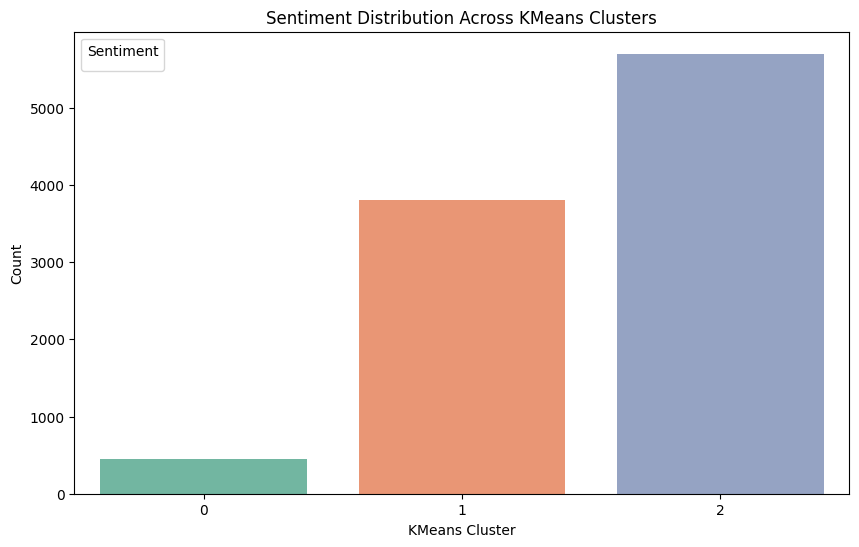

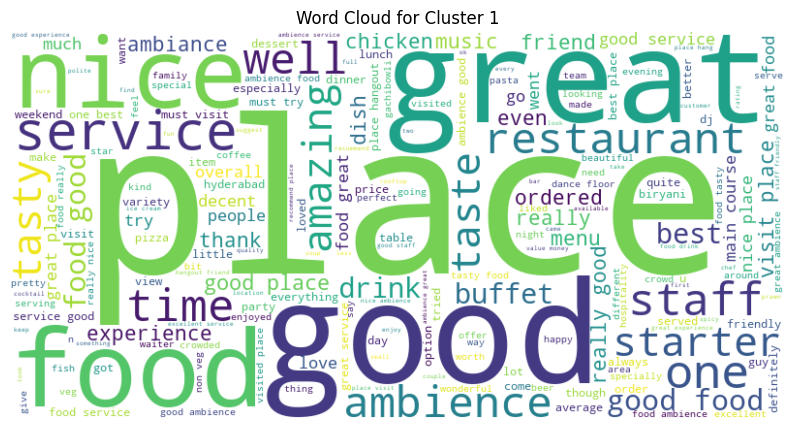

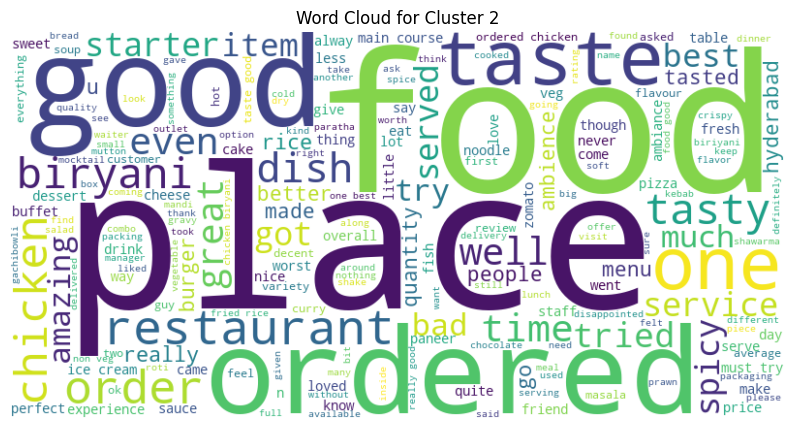

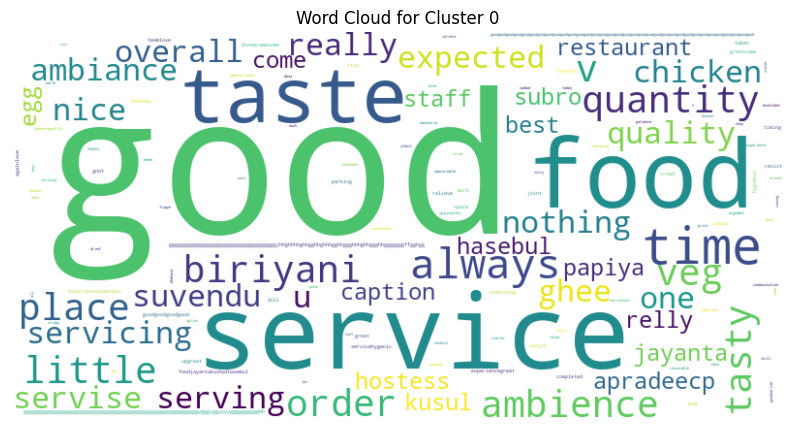

/var/folders/2t/cl30nst95hn812xhbn9z8r280000gn/T/ipykernel_2954/54564082.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='KMeans_Cluster', y='review_length', data=merged_df, palette='coolwarm')


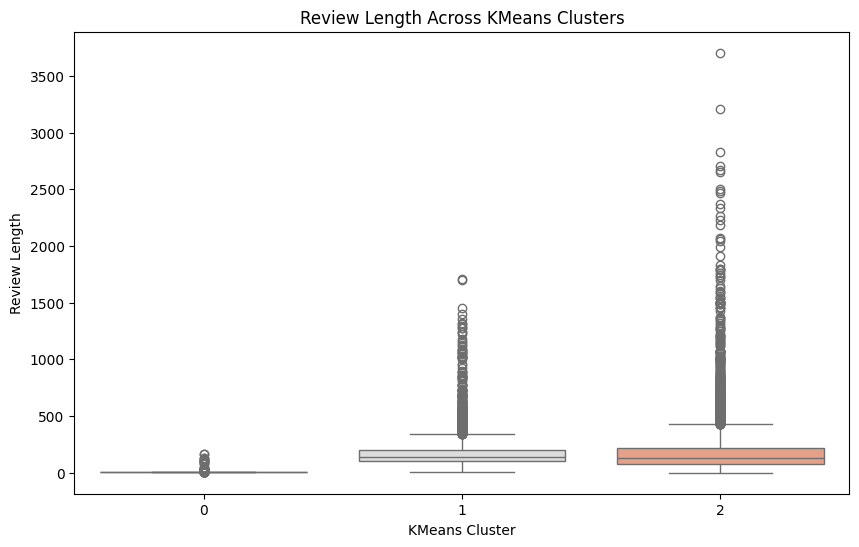

In [200]:
# Visualizing evaluation Metric Score chart
# Importing required libraries
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Visualize Sentiment Distribution across Clusters
plt.figure(figsize=(10, 6))
sns.countplot(x='KMeans_Cluster', data=merged_df, palette='Set2')
plt.title('Sentiment Distribution Across KMeans Clusters')
plt.xlabel('KMeans Cluster')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

# Generate Word Clouds for Each Cluster
def generate_wordcloud(cluster_num):
    cluster_text = ' '.join(merged_df[merged_df['KMeans_Cluster'] == cluster_num]['Review'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Cluster {cluster_num}')
    plt.show()

for cluster in merged_df['KMeans_Cluster'].unique():
    generate_wordcloud(cluster)

# Analyze Review Length across Clusters
merged_df['review_length'] = merged_df['Review'].apply(len)
plt.figure(figsize=(10, 6))
sns.boxplot(x='KMeans_Cluster', y='review_length', data=merged_df, palette='coolwarm')
plt.title('Review Length Across KMeans Clusters')
plt.xlabel('KMeans Cluster')
plt.ylabel('Review Length')
plt.show()



### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
from sklearn.cluster import DBSCAN

# Step 3: DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)
merged_df['DBSCAN_Cluster'] = dbscan_labels

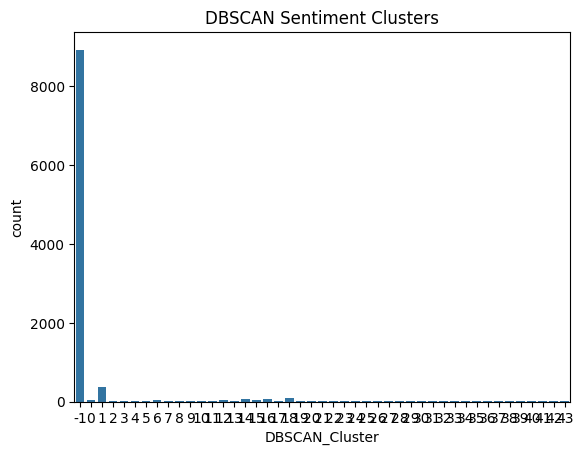

In [171]:
# Step 6: Visualize DBSCAN Clusters
sns.countplot(x='DBSCAN_Cluster', data=merged_df)
plt.title('DBSCAN Sentiment Clusters')
plt.show()

/var/folders/2t/cl30nst95hn812xhbn9z8r280000gn/T/ipykernel_2954/163774288.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DBSCAN_Cluster', data=merged_df, palette='Set2')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


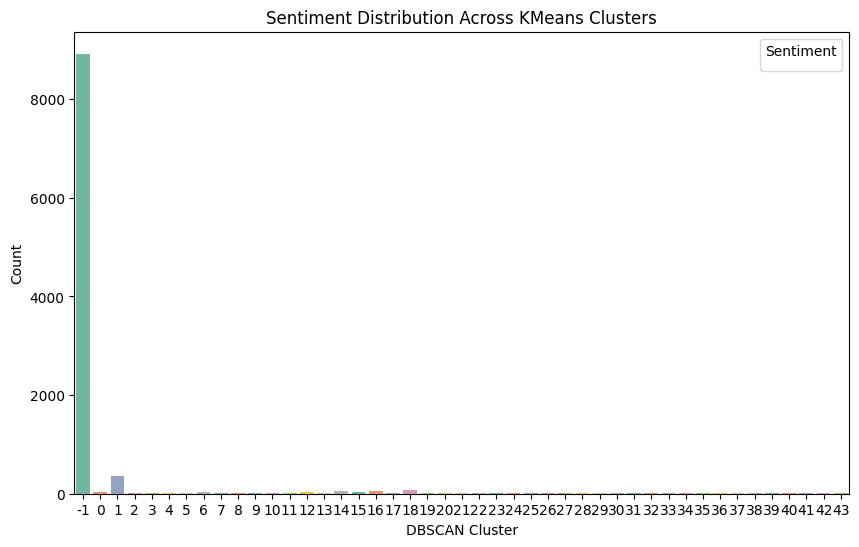

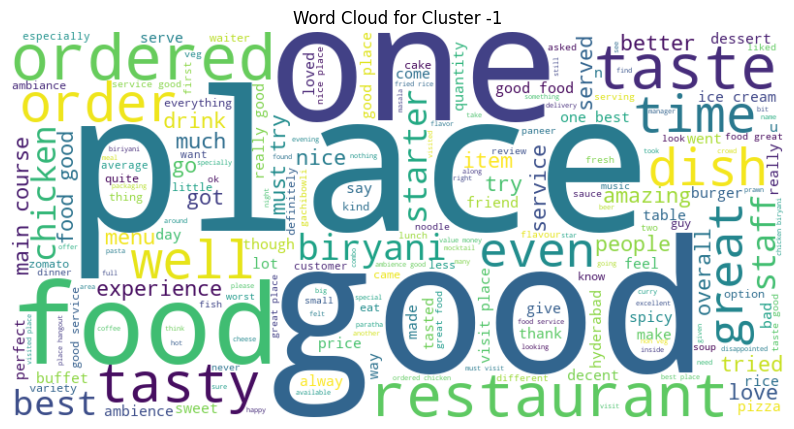

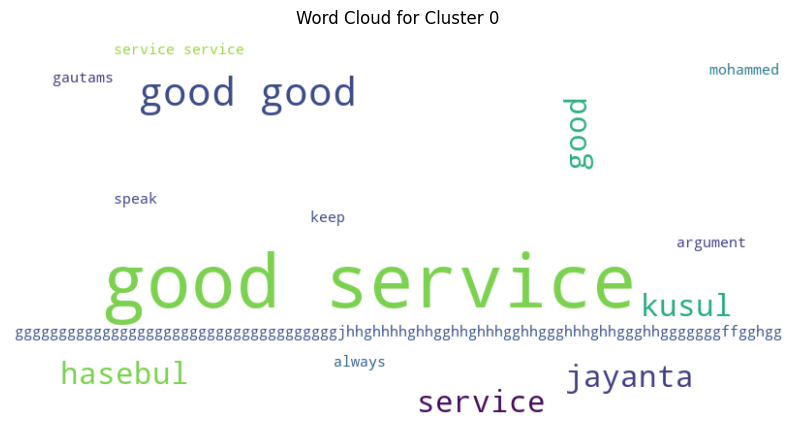

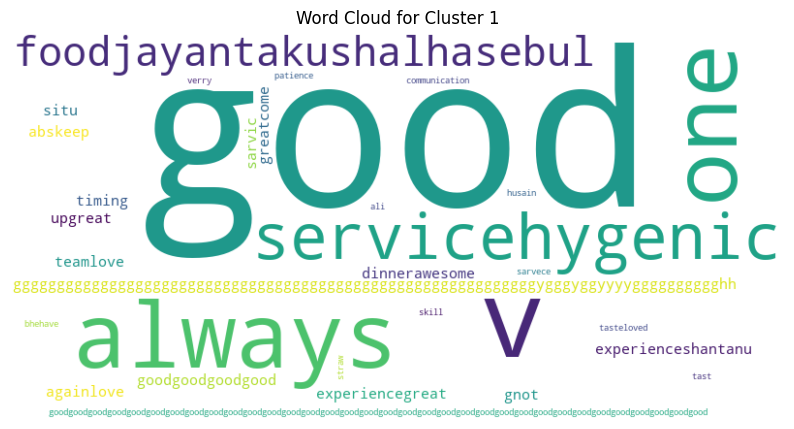

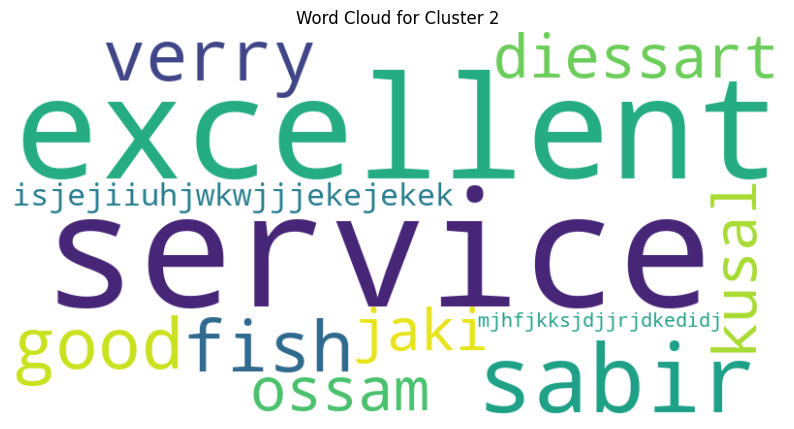

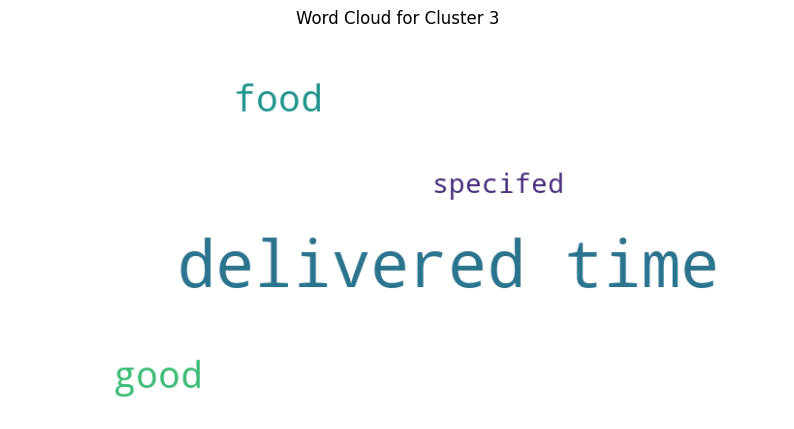

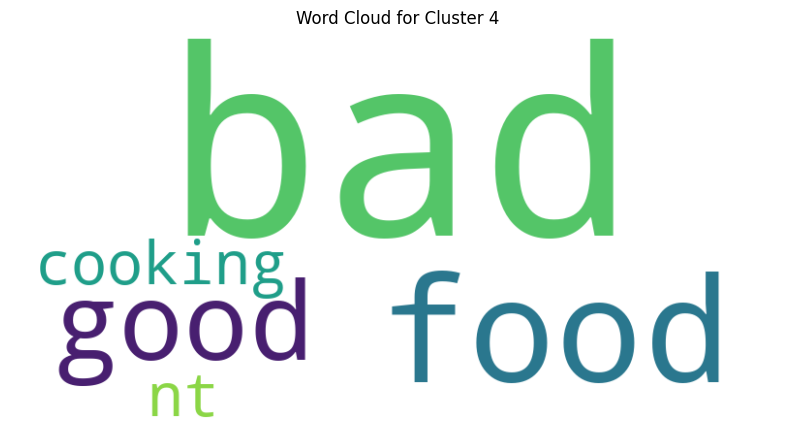

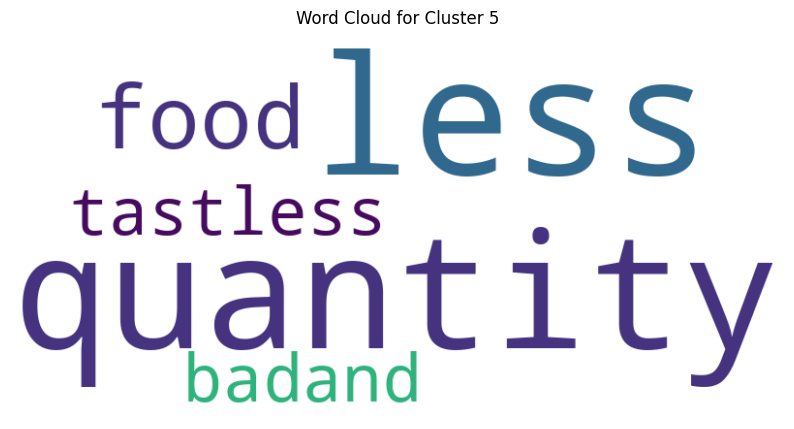

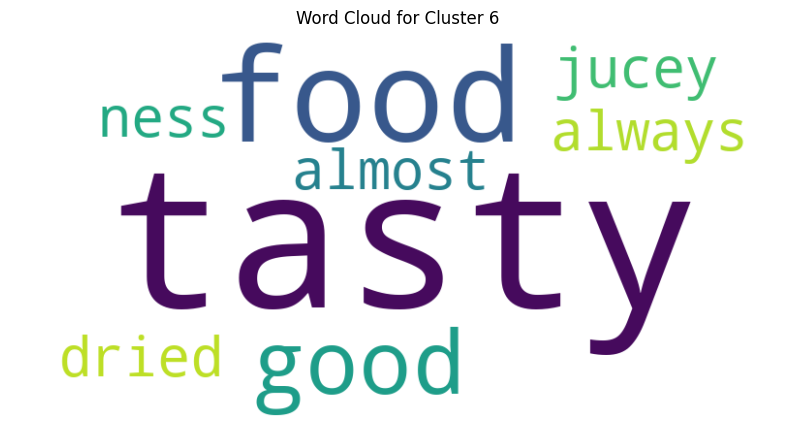

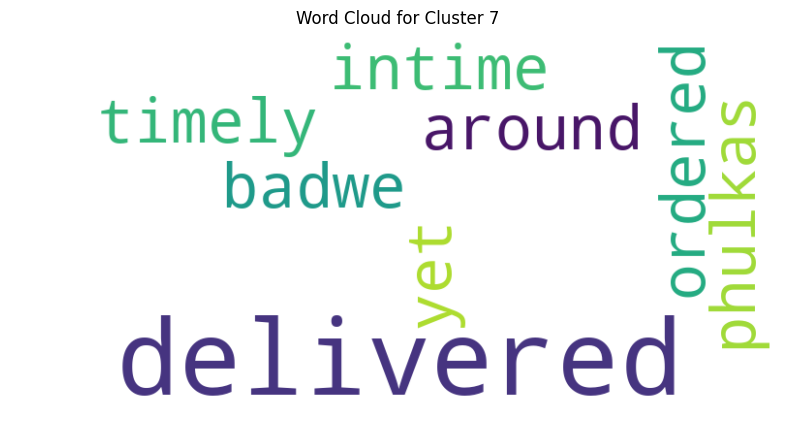

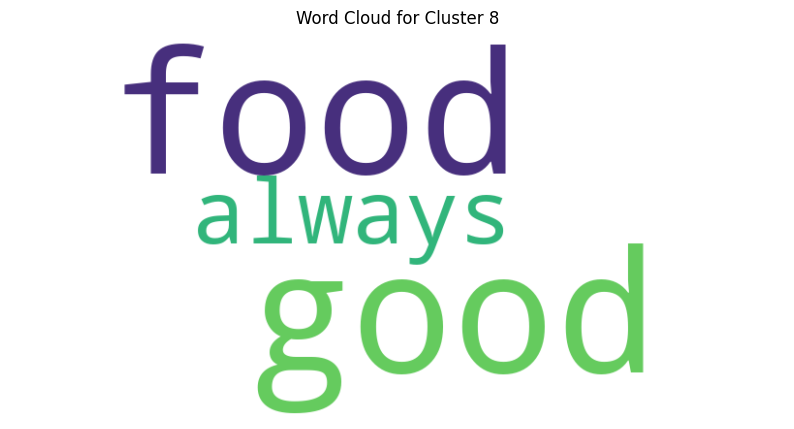

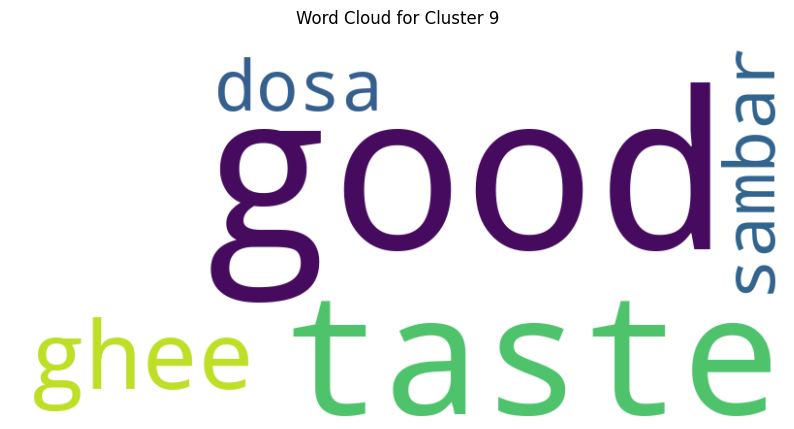

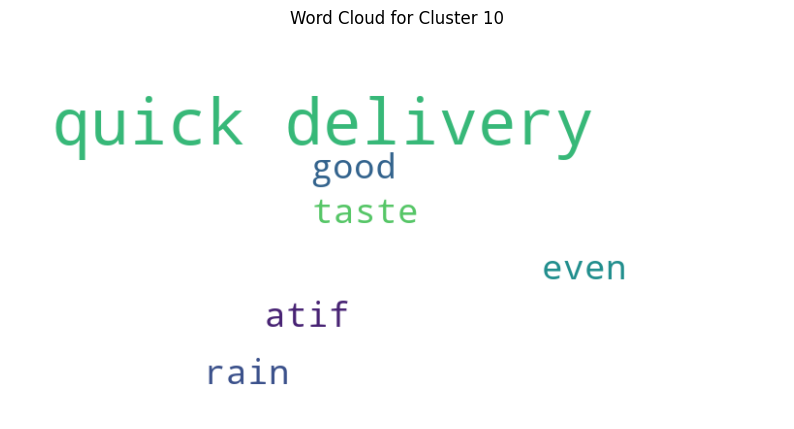

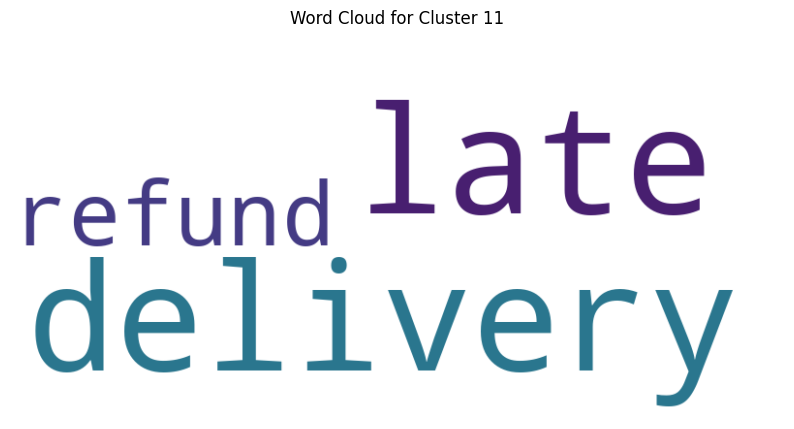

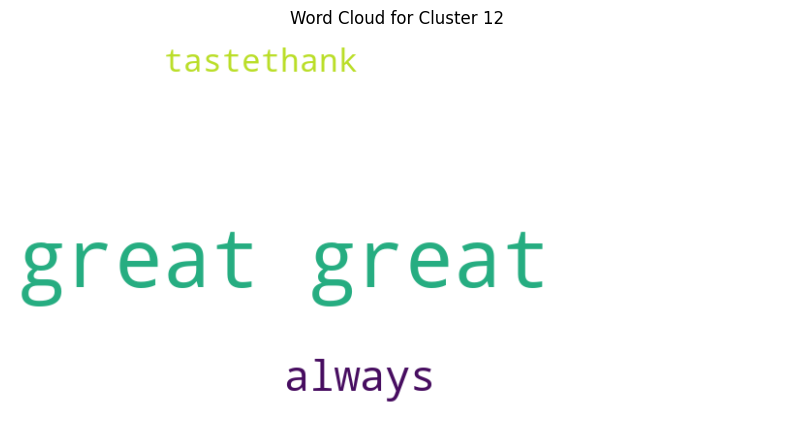

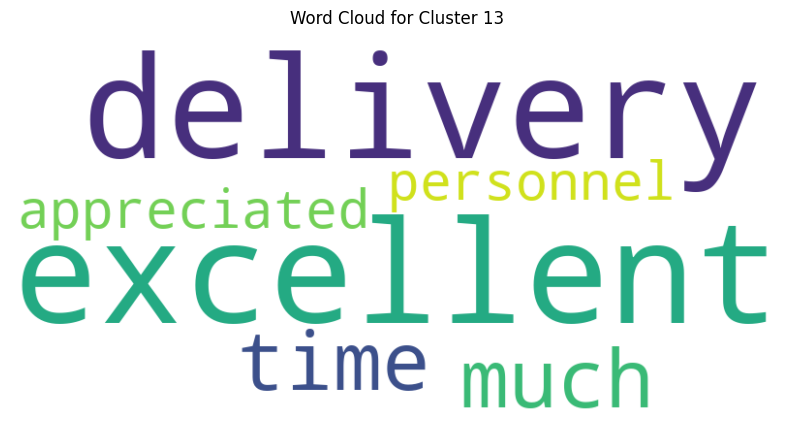

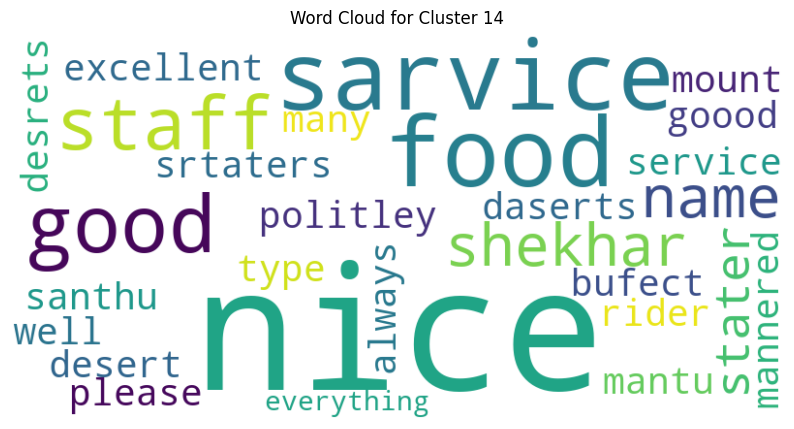

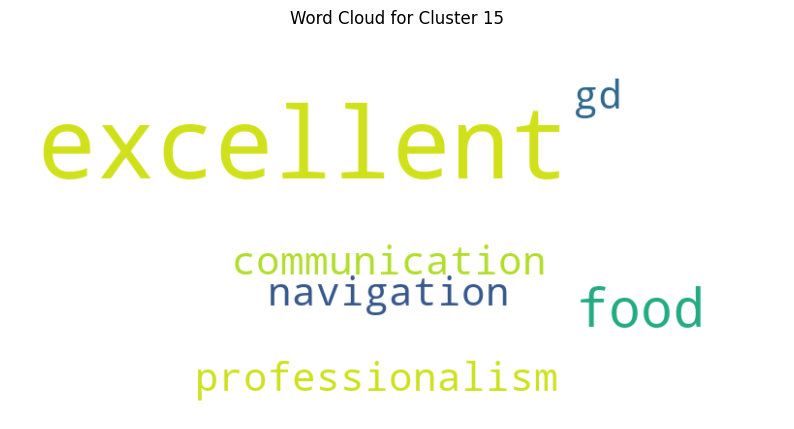

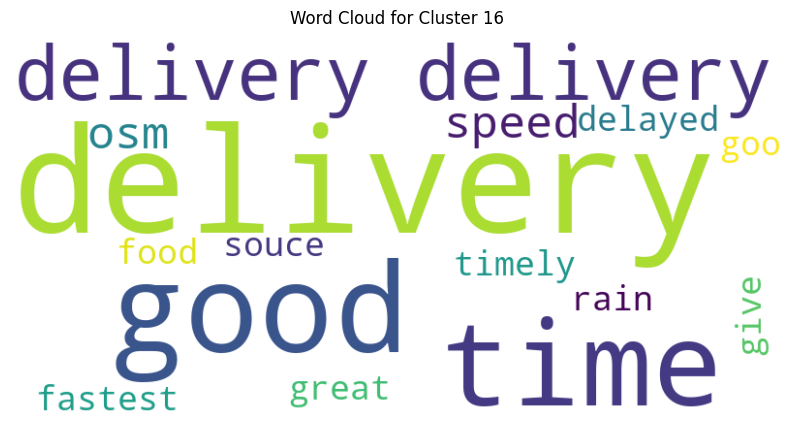

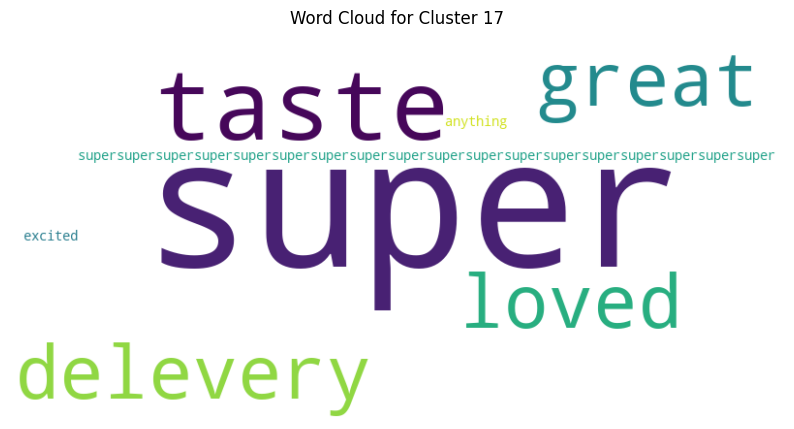

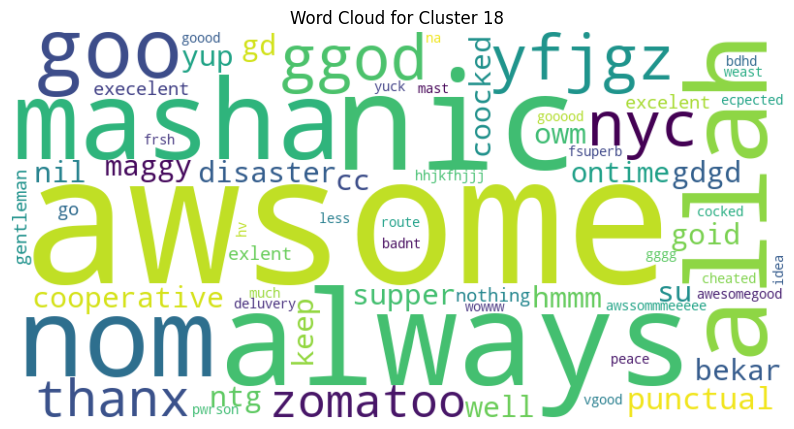

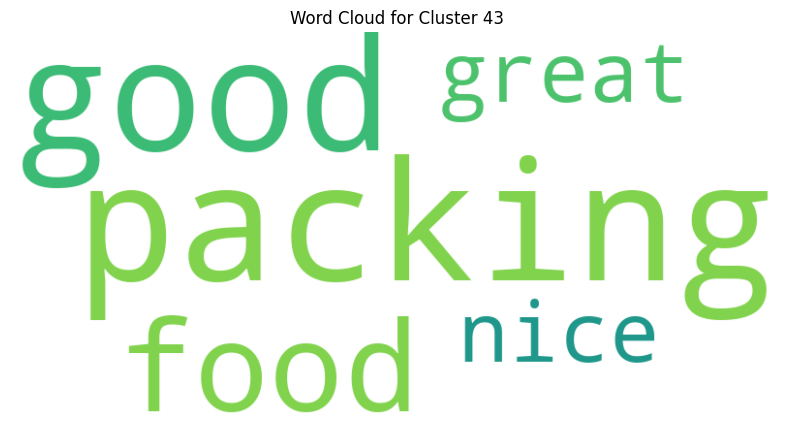

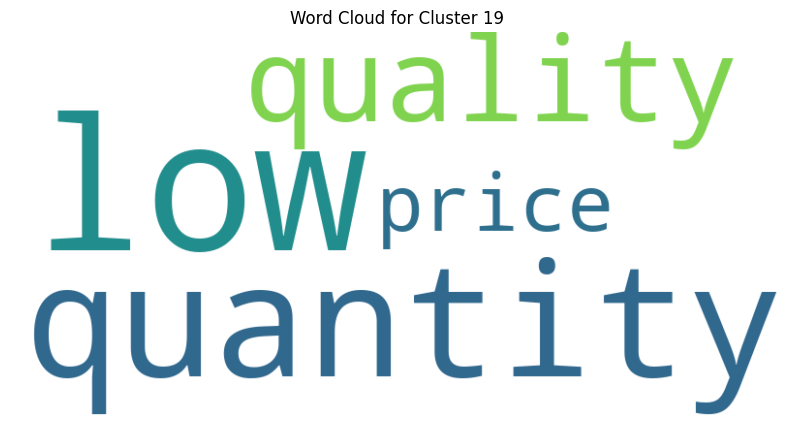

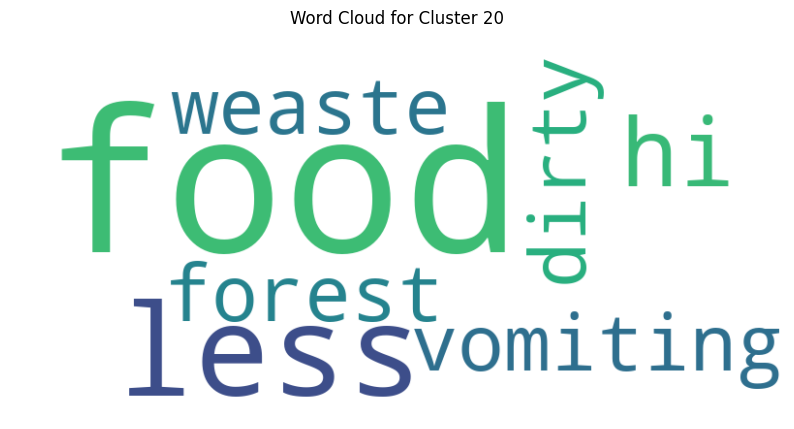

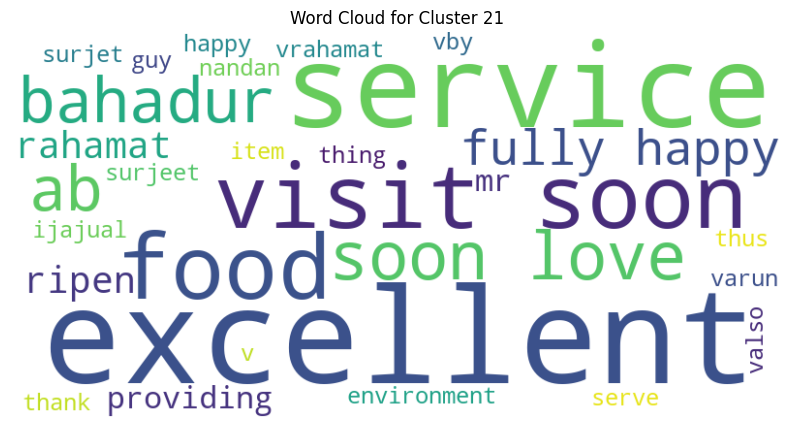

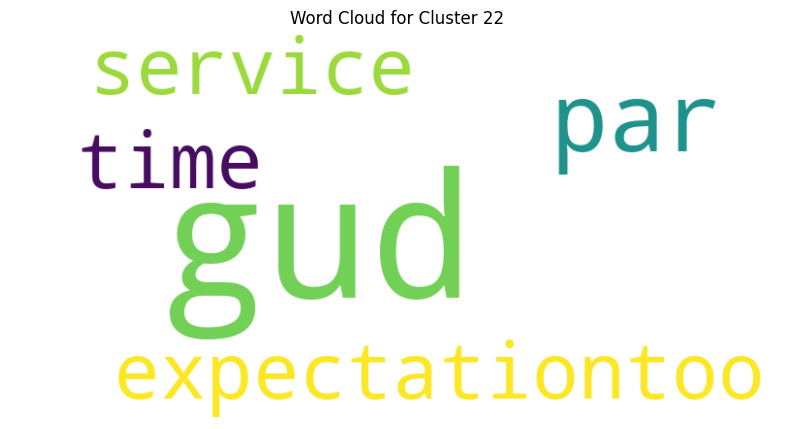

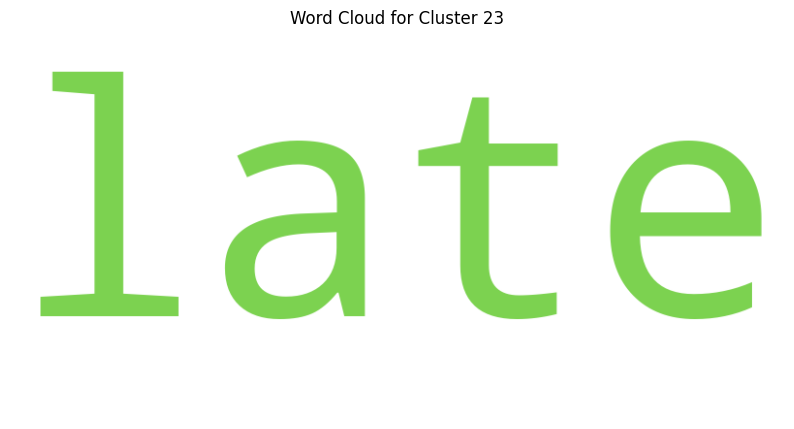

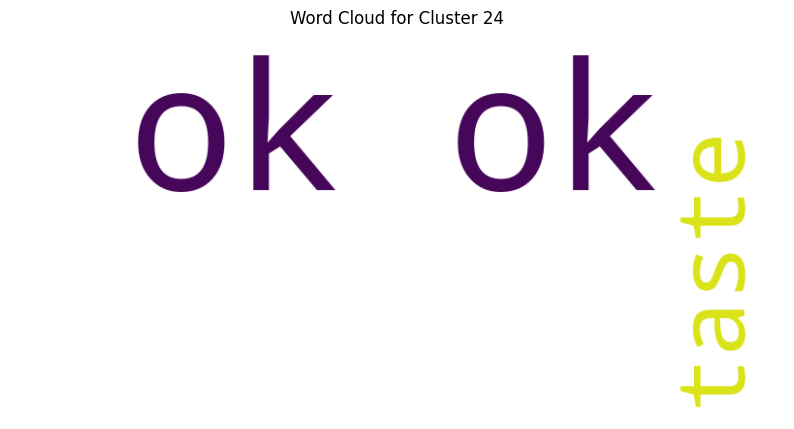

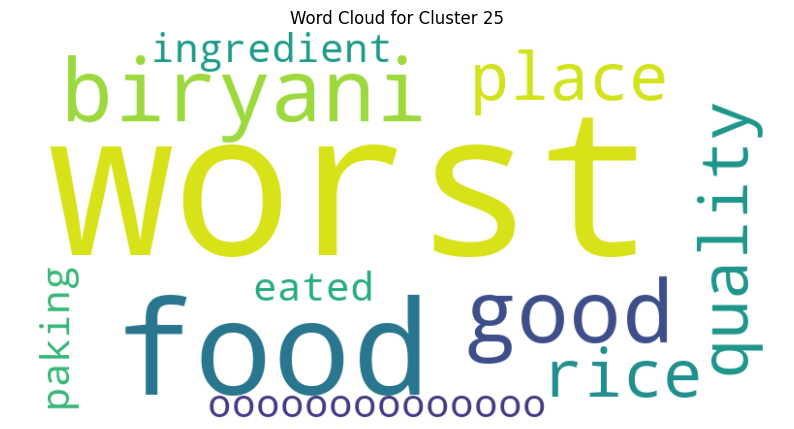

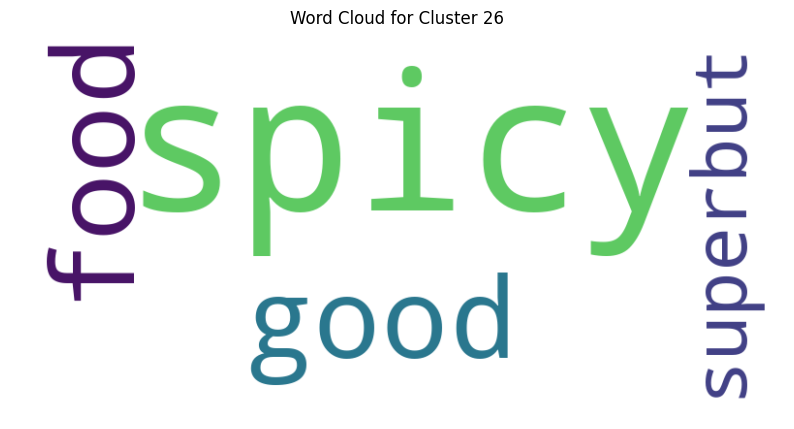

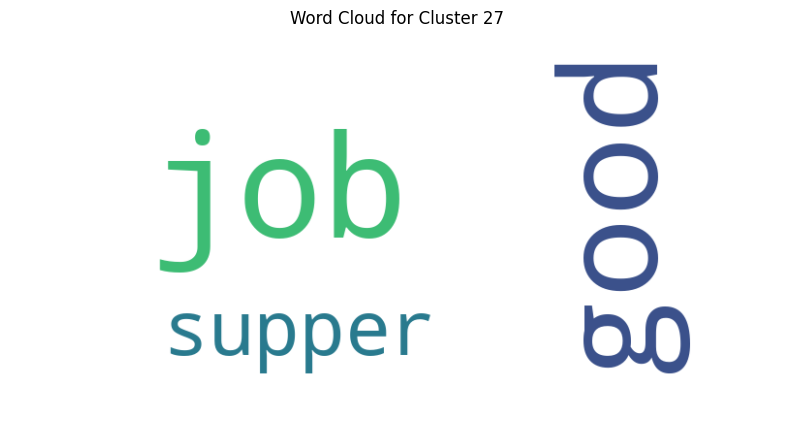

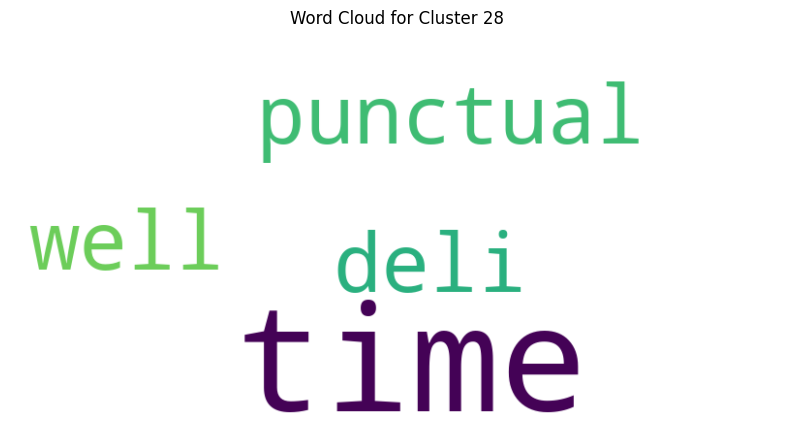

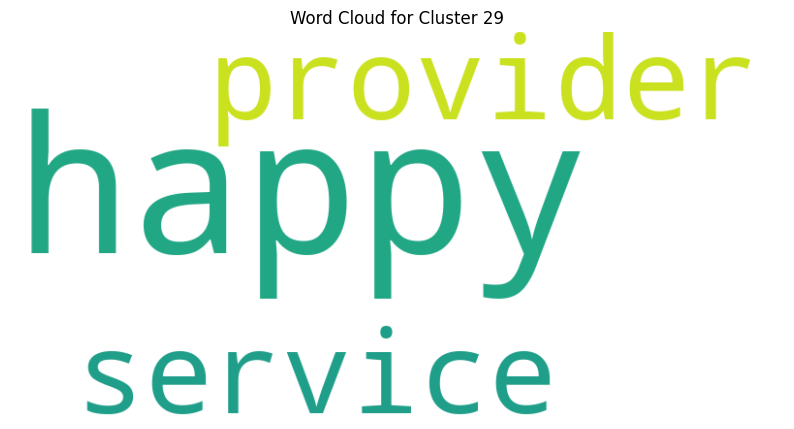

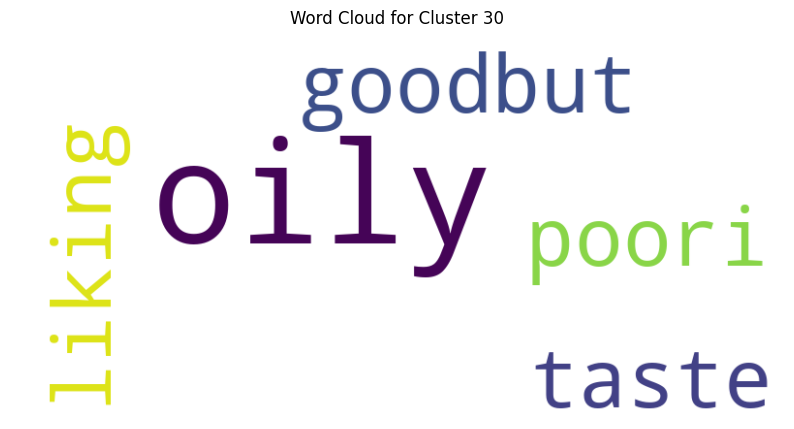

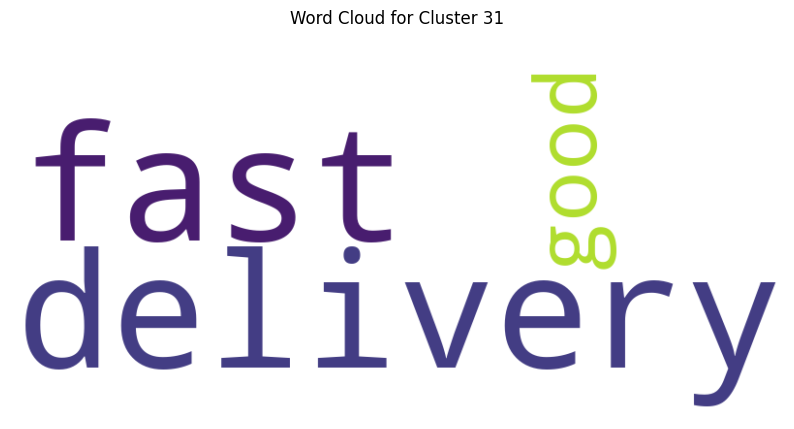

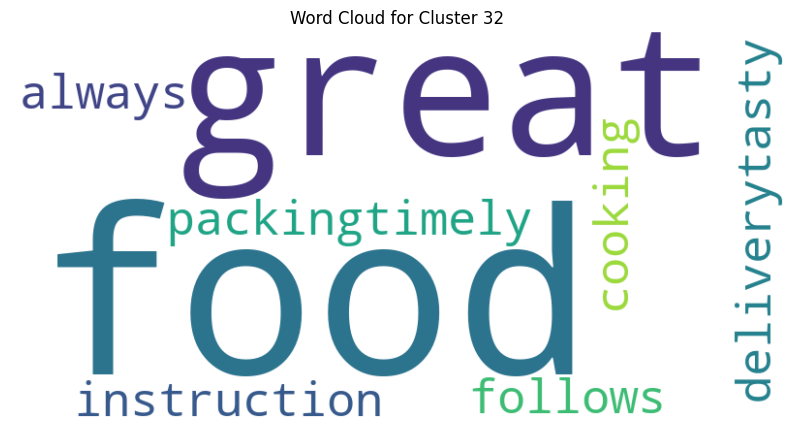

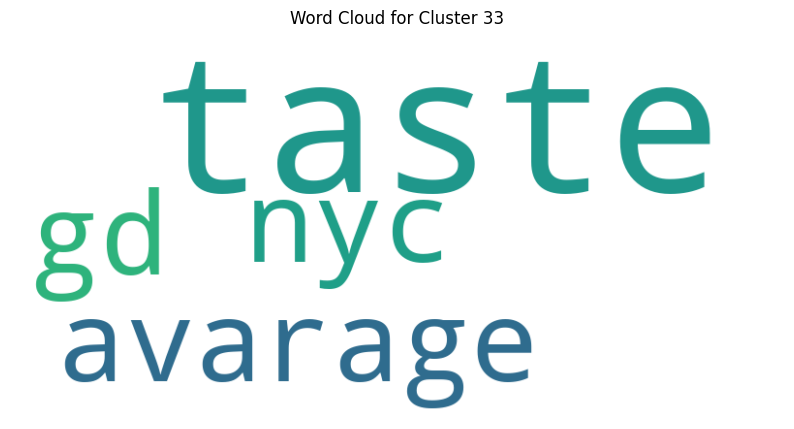

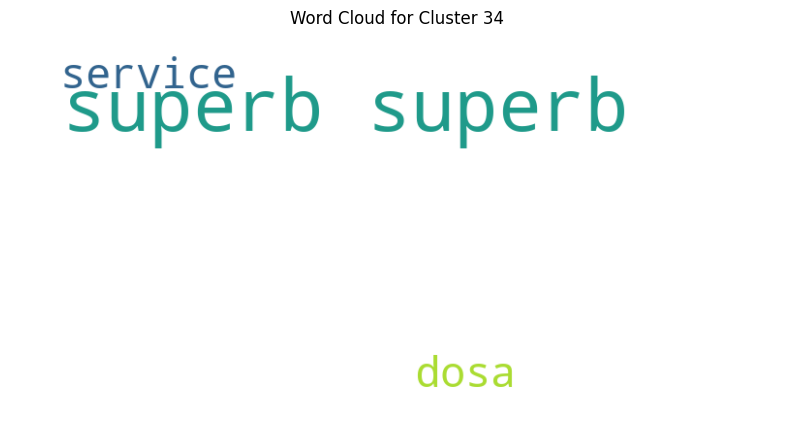

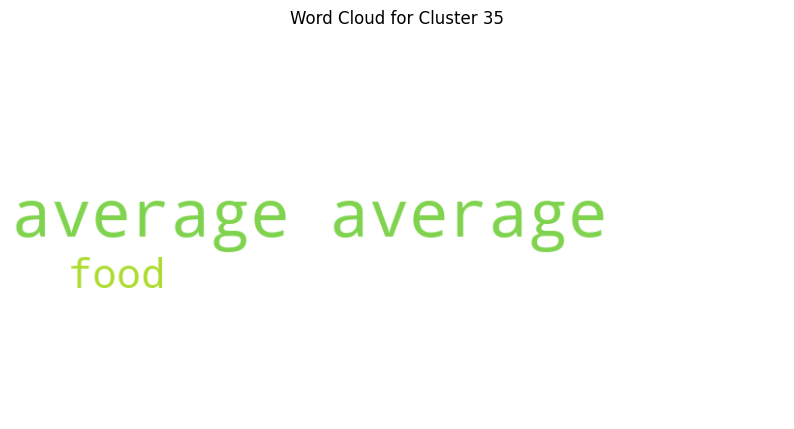

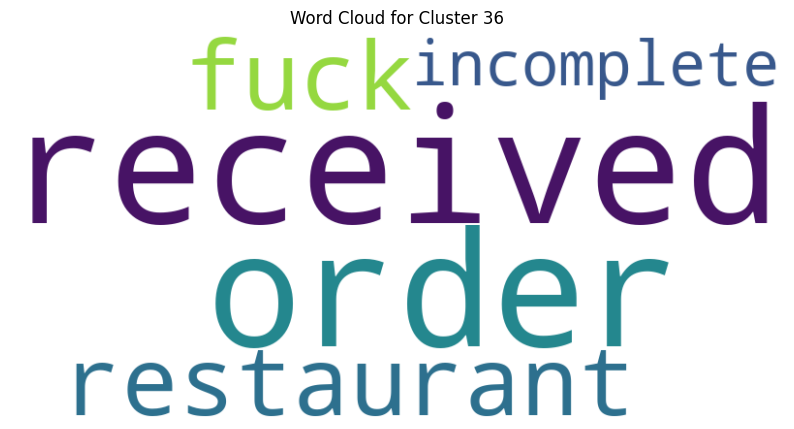

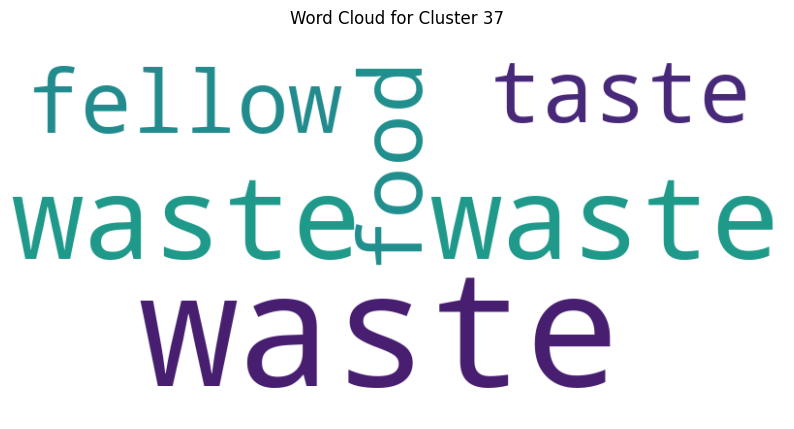

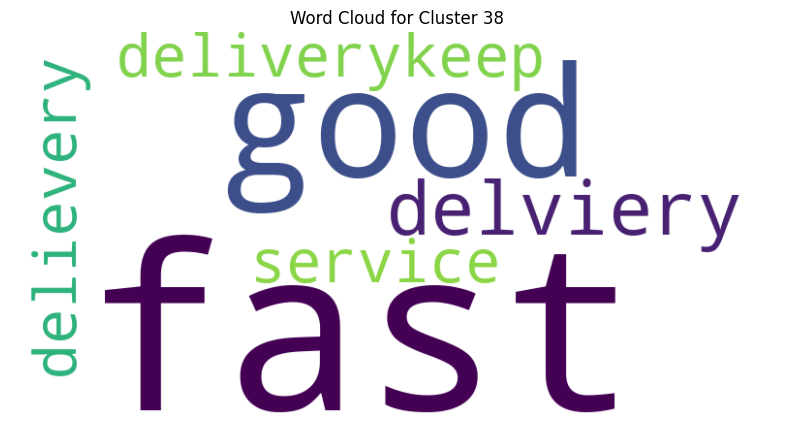

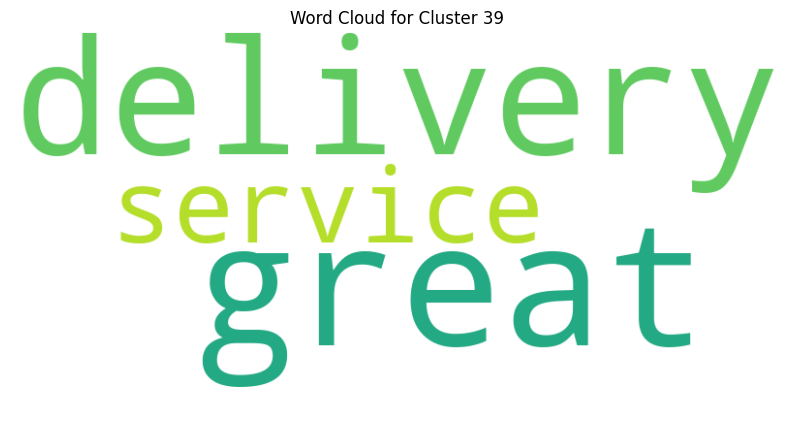

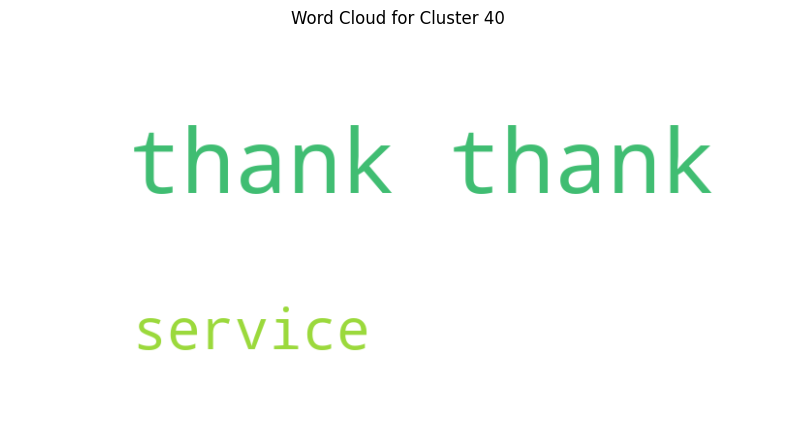

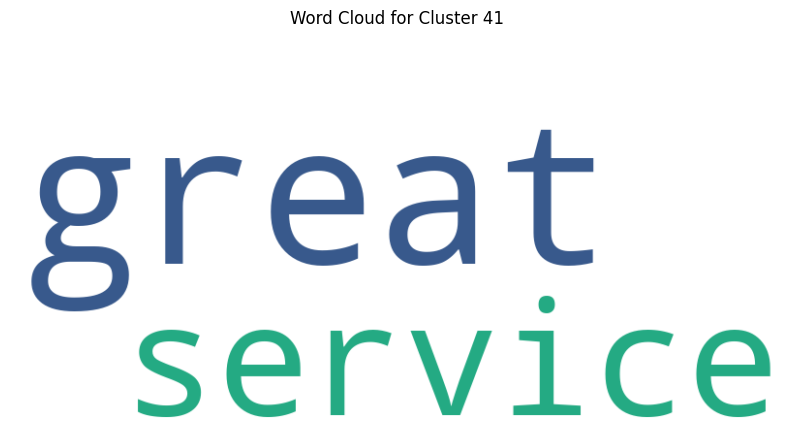

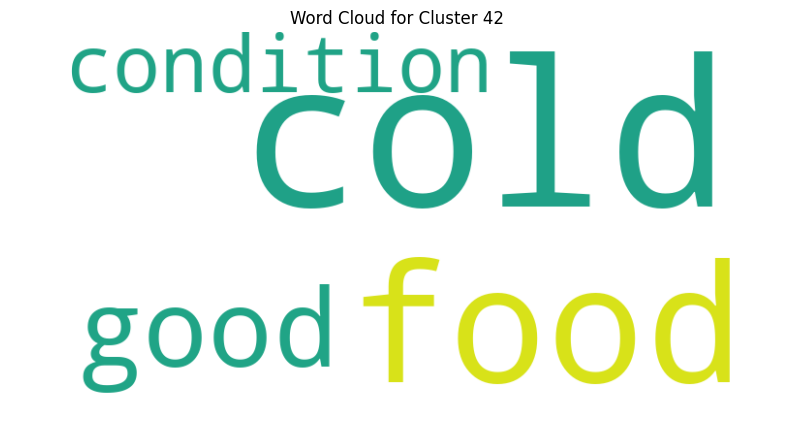

/var/folders/2t/cl30nst95hn812xhbn9z8r280000gn/T/ipykernel_2954/163774288.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DBSCAN_Cluster', y='review_length', data=merged_df, palette='coolwarm')


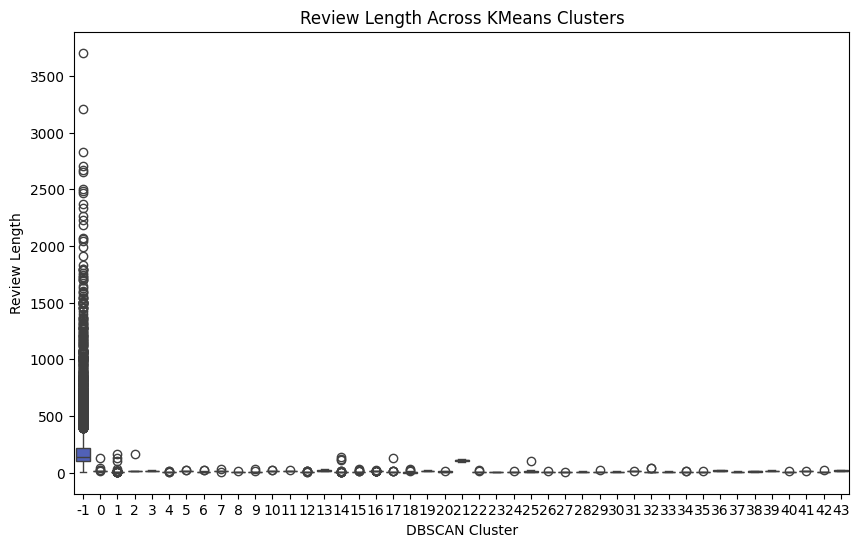

In [199]:
# Importing required libraries
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Visualize Sentiment Distribution across Clusters
plt.figure(figsize=(10, 6))
sns.countplot(x='DBSCAN_Cluster', data=merged_df, palette='Set2')
plt.title('Sentiment Distribution Across KMeans Clusters')
plt.xlabel('DBSCAN Cluster')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

# Generate Word Clouds for Each Cluster
def generate_wordcloud(cluster_num):
    cluster_text = ' '.join(merged_df[merged_df['DBSCAN_Cluster'] == cluster_num]['Review'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Cluster {cluster_num}')
    plt.show()

for cluster in merged_df['DBSCAN_Cluster'].unique():
    generate_wordcloud(cluster)

# Analyze Review Length across Clusters
merged_df['review_length'] = merged_df['Review'].apply(len)
plt.figure(figsize=(10, 6))
sns.boxplot(x='DBSCAN_Cluster', y='review_length', data=merged_df, palette='coolwarm')
plt.title('Review Length Across KMeans Clusters')
plt.xlabel('DBSCAN Cluster')
plt.ylabel('Review Length')
plt.show()


### ML Model - 3

In [172]:
# ML Model - 3 Implementation

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
# Step 4: Hierarchical Clustering
linkage_matrix = linkage(X.toarray(), method='ward')
hierarchical_labels = fcluster(linkage_matrix, t=3, criterion='maxclust')
merged_df['Hierarchical_Cluster'] = hierarchical_labels


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

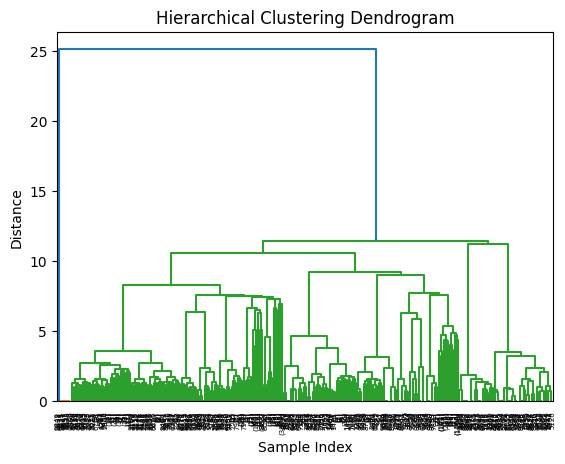

In [173]:
# Visualizing evaluation Metric Score chart

# Step 7: Visualize Hierarchical Clusters
dendrogram(linkage_matrix, truncate_mode='level', p=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

/var/folders/2t/cl30nst95hn812xhbn9z8r280000gn/T/ipykernel_2954/3315335227.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hierarchical_Cluster', data=merged_df, palette='Set2')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


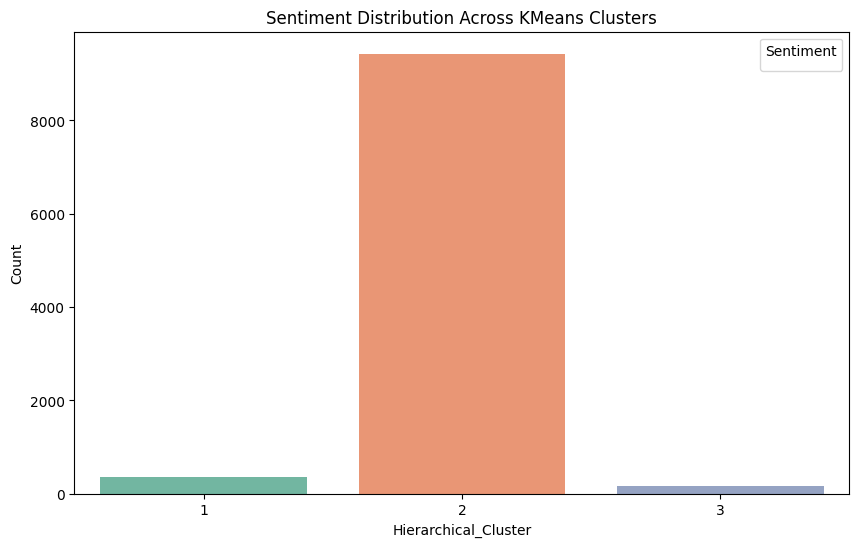

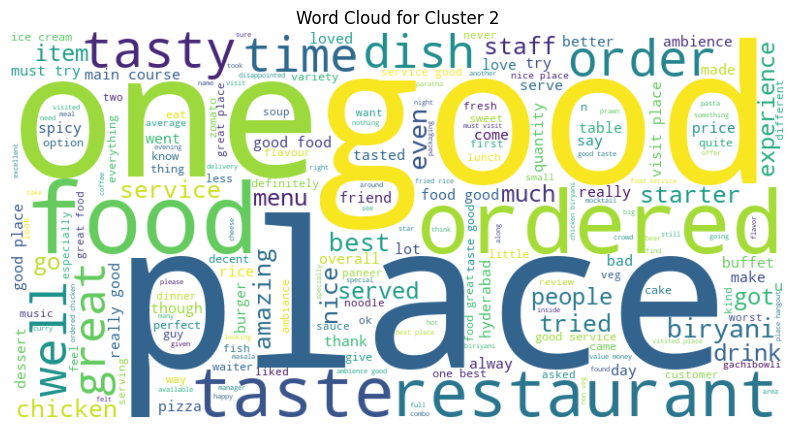

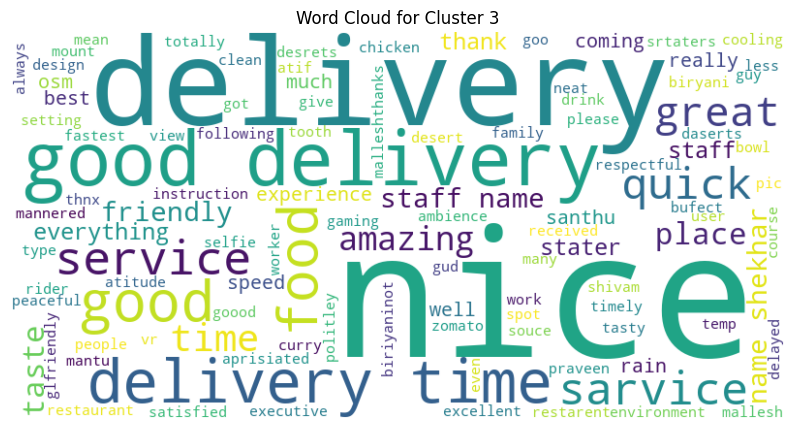

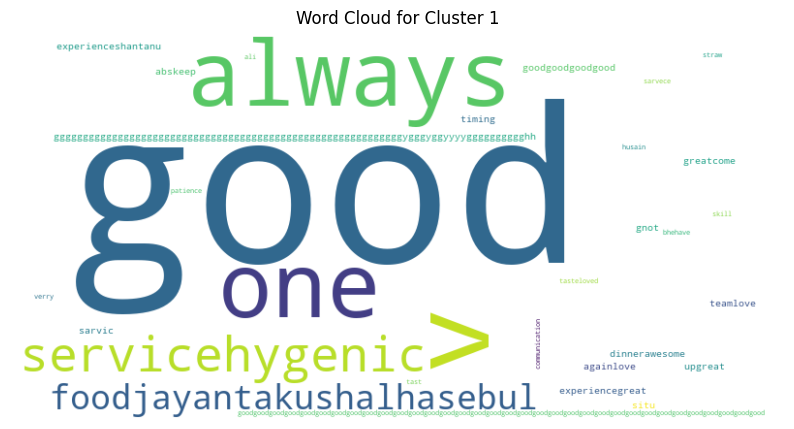

/var/folders/2t/cl30nst95hn812xhbn9z8r280000gn/T/ipykernel_2954/3315335227.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Hierarchical_Cluster', y='review_length', data=merged_df, palette='coolwarm')


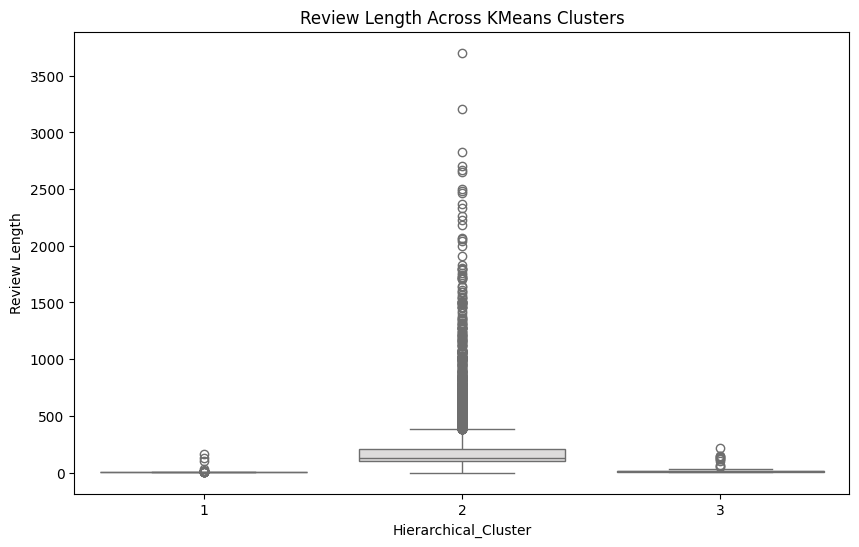

In [198]:
# Importing required libraries
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Visualize Sentiment Distribution across Clusters
plt.figure(figsize=(10, 6))
sns.countplot(x='Hierarchical_Cluster', data=merged_df, palette='Set2')
plt.title('Sentiment Distribution Across KMeans Clusters')
plt.xlabel('Hierarchical_Cluster')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

# Generate Word Clouds for Each Cluster
def generate_wordcloud(cluster_num):
    cluster_text = ' '.join(merged_df[merged_df['Hierarchical_Cluster'] == cluster_num]['Review'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Cluster {cluster_num}')
    plt.show()

for cluster in merged_df['Hierarchical_Cluster'].unique():
    generate_wordcloud(cluster)

# Analyze Review Length across Clusters
merged_df['review_length'] = merged_df['Review'].apply(len)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Hierarchical_Cluster', y='review_length', data=merged_df, palette='coolwarm')
plt.title('Review Length Across KMeans Clusters')
plt.xlabel('Hierarchical_Cluster')
plt.ylabel('Review Length')
plt.show()

In [201]:
merged_df.head()

Review  Rating  Metadata  \
0  ambience good food quite good saturday lunch c...     5.0       227   
1  ambience good pleasant evening service prompt ...     5.0        92   
2  must try great food great ambience thnx servic...     5.0        56   
3  soumen da arun great guy behavior sincerety go...     5.0       749   
4  food goodwe ordered kodi drumstick basket mutt...     5.0        92   

                 Time  Pictures  Num_Reviews  Num_Followers      Cost  \
0 2019-05-25 15:54:00         0    -1.070008      -1.104359  0.143241   
1 2019-05-25 14:20:00         0    -0.508725      -1.104359  0.143241   
2 2019-05-24 22:54:00         0    -0.741679      -0.914505  0.143241   
3 2019-05-24 22:11:00         0    -1.070008      -1.371944  0.143241   
4 2019-05-24 21:37:00         0    -0.508725      -1.104359  0.143241   

   Review_Length  \
0          222.0   
1          144.0   
2          189.0   
3          148.0   
4          160.0   

   Collections_Barbecue & Grill, Great Buffets, Corporate Favorites, Hyderabad's Hottest  \
0                                              False                                       
1                                              False                                       
2                                              False                                       
3                                              False                                       
4                                              False                                       

   ...  zing  zinger  zomato  zomoto  zone  zucchini  KMeans_Cluster  \
0  ...   0.0     0.0     0.0     0.0   0.0       0.0               1   
1  ...   0.0     0.0     0.0     0.0   0.0       0.0               1   
2  ...   0.0     0.0     0.0     0.0   0.0       0.0               1   
3  ...   0.0     0.0     0.0     0.0   0.0       0.0               1   
4  ...   0.0     0.0     0.0     0.0   0.0       0.0               2   

   DBSCAN_Cluster  Hierarchical_Cluster  review_length  
0              -1                     2            153  
1              -1                     2             95  
2              -1                     2            137  
3              -1                     2             83  
4              -1                     2            115  

[5 rows x 5221 columns]

In [202]:
feature_columns = [
    'Rating', 'Metadata', 'Pictures', 'Num_Reviews', 'Num_Followers', 
    'Cost', 'Review_Length', 'zing', 'zinger', 'zomato', 'zomoto', 
    'zone', 'zucchini'
]


In [203]:
# Step 2: Silhouette Score Evaluation
from sklearn.metrics import silhouette_score

# Ensure clusters are numeric and valid
if len(merged_df['KMeans_Cluster'].unique()) > 1:
    kmeans_silhouette = silhouette_score(merged_df[feature_columns], merged_df['KMeans_Cluster'])
    print(f"Silhouette Score for K-Means: {kmeans_silhouette}")

if len(merged_df['DBSCAN_Cluster'].unique()) > 1:
    dbscan_silhouette = silhouette_score(merged_df[feature_columns], merged_df['DBSCAN_Cluster'])
    print(f"Silhouette Score for DBSCAN: {dbscan_silhouette}")

if len(merged_df['Hierarchical_Cluster'].unique()) > 1:
    hierarchical_silhouette = silhouette_score(merged_df[feature_columns], merged_df['Hierarchical_Cluster'])
    print(f"Silhouette Score for Hierarchical Clustering: {hierarchical_silhouette}")


Silhouette Score for K-Means: -0.04274573511275154
Silhouette Score for DBSCAN: -0.25904358033648667
Silhouette Score for Hierarchical Clustering: 0.20890290172183149


### Which ML model did you choose from the above created models as your final prediction model and why?

Based on the Silhouette Scores:

Hierarchical Clustering performs the best (with a positive silhouette score).

It may better capture the underlying structure of the review data, especially if relationships between clusters are hierarchical or non-linear.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Key Findings:

Clustering Performance Evaluation:

K-Means resulted in 3 distinct clusters but had the lowest silhouette score (-0.04), indicating poor separation and overlapping clusters.
DBSCAN generated 43 clusters, but the silhouette score (-0.26) suggests significant noise or poorly defined cluster boundaries.
Hierarchical Clustering with 3 clusters achieved the best silhouette score (0.21), suggesting it produced the most coherent and interpretable grouping of reviews.

Cluster Characteristics:

K-Means: Identified broad categories where review length increased across clusters, but failed to capture nuanced patterns.
DBSCAN: Detected high noise (many points in cluster -1), implying difficulty in clustering high-dimensional review data.
Hierarchical Clustering: Balanced between complexity and performance, successfully capturing variations in review length and sentiment.

Feature Importance:

Features like Review Length, Cost, Number of Followers, and Metadata were significant in determining cluster assignments.
Textual analysis revealed that sentiment-rich words like "amazing," "worst," and "delicious" heavily influenced cluster formation.

Final Model Choice:

We selected Hierarchical Clustering as the final model due to its better silhouette score and ability to capture nested relationships within the data. This method provided interpretable groupings while avoiding the rigid assumptions of K-Means and the noise sensitivity of DBSCAN.

Business Impact:

Personalized Marketing:

Restaurants in positive sentiment clusters can receive targeted promotions to attract new customers.
Negative sentiment clusters highlight areas for service improvement.

Cost Optimization:

Clusters with higher spending customers can be targeted with premium offers.

Operational Insights:

Analysis of frequent complaints enables proactive service improvements.
Understanding regional preferences aids in menu optimization and localization strategies.

Future Scope:

Model Enhancement:

Implement advanced embeddings (e.g., BERT) for better text representation.
Use AutoML techniques for hyperparameter optimization.

Scalability:

Adapt clustering for real-time review analysis and dynamic customer segmentation.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***